# R script to plot and analyse population sizes in the GLUE dataset

## Libraries

In [1]:
# Load required packages
library(ggplot2)
library(SIBER)
library(dplyr)
library(lme4)
library(readr)
library(glmmTMB)
library(MASS)
library(DHARMa)
library(emmeans)
library(stringr)
library(MuMIn)
library(glmmTMB)
library(lmerTest)
library(ggpubr)
library(IRdisplay)
library(tidyverse)
library(tidyr)
library(data.table)

Le chargement a nécessité le package : spatstat

Le chargement a nécessité le package : spatstat.data

Le chargement a nécessité le package : spatstat.geom

spatstat.geom 3.0-3

Le chargement a nécessité le package : spatstat.random

spatstat.random 3.0-1

Le chargement a nécessité le package : spatstat.explore

Le chargement a nécessité le package : nlme

spatstat.explore 3.0-5

Le chargement a nécessité le package : spatstat.model

Le chargement a nécessité le package : rpart

spatstat.model 3.0-2

Le chargement a nécessité le package : spatstat.linnet

spatstat.linnet 3.0-2


spatstat 3.0-2 
For an introduction to spatstat, type ‘beginner’ 



Attachement du package : ‘dplyr’


L'objet suivant est masqué depuis ‘package:nlme’:

    collapse


Les objets suivants sont masqués depuis ‘package:stats’:

    filter, lag


Les objets suivants sont masqués depuis ‘package:base’:

    intersect, setdiff, setequal, union


Le chargement a nécessité le package : Matrix


Attachement du packag

## Plot variation of population size through time per city

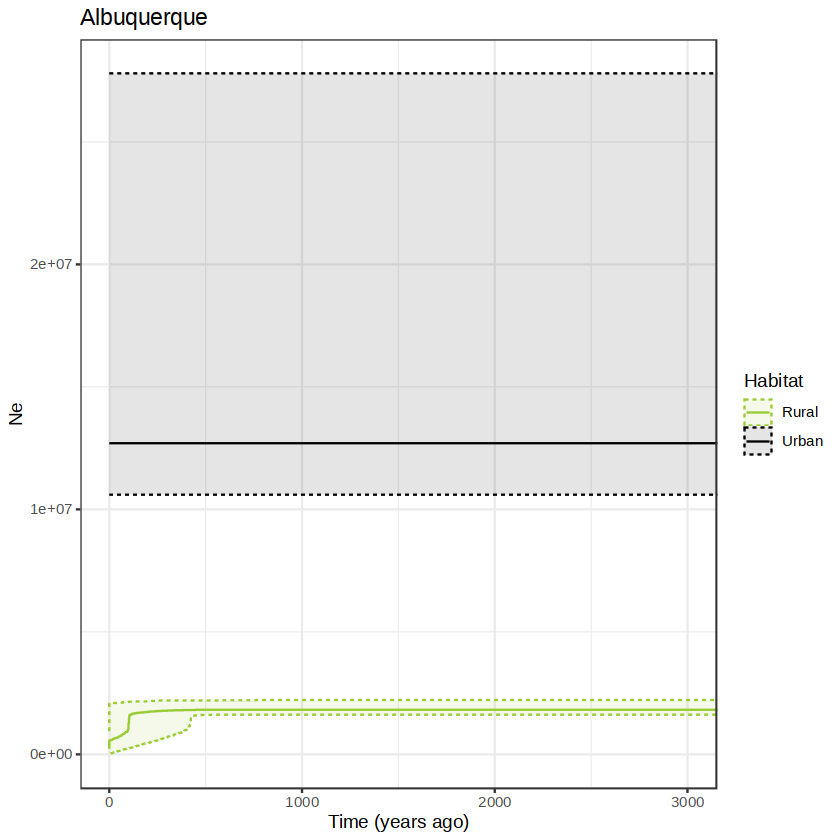

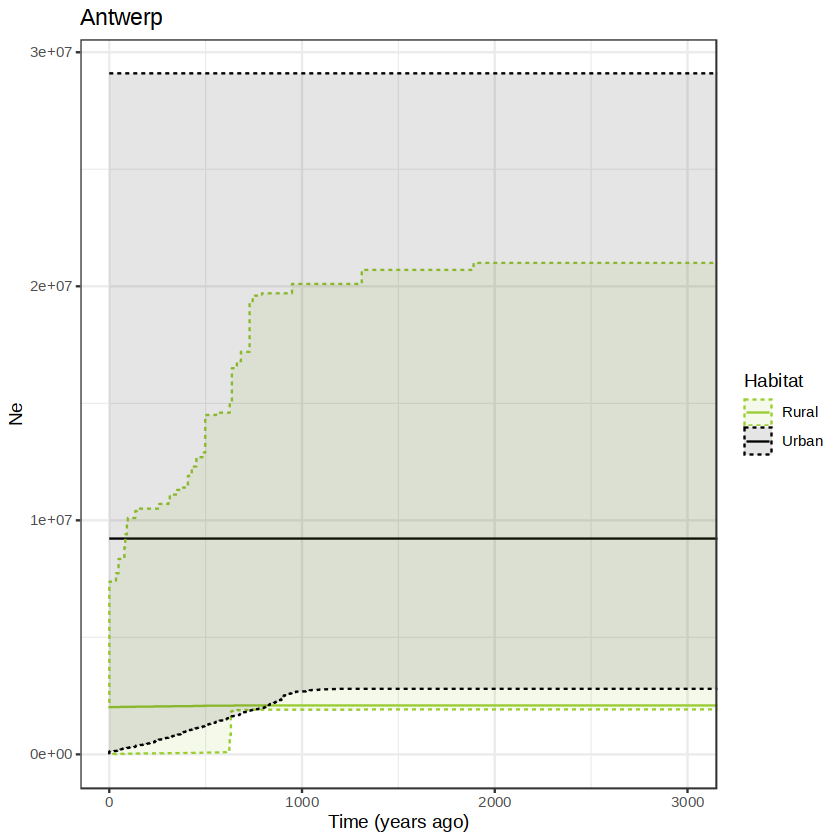

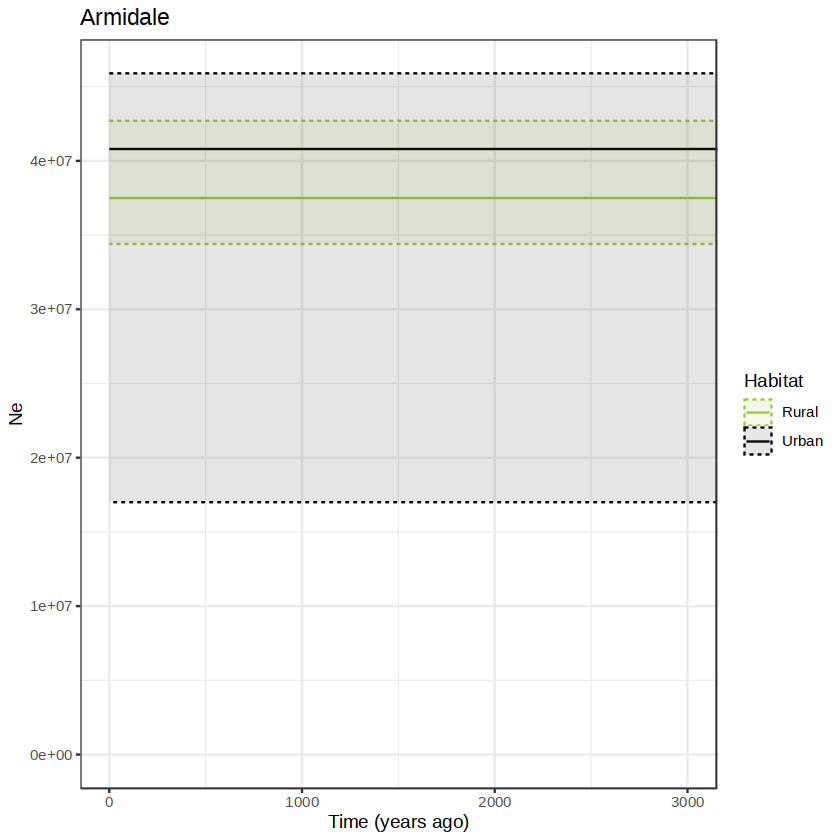

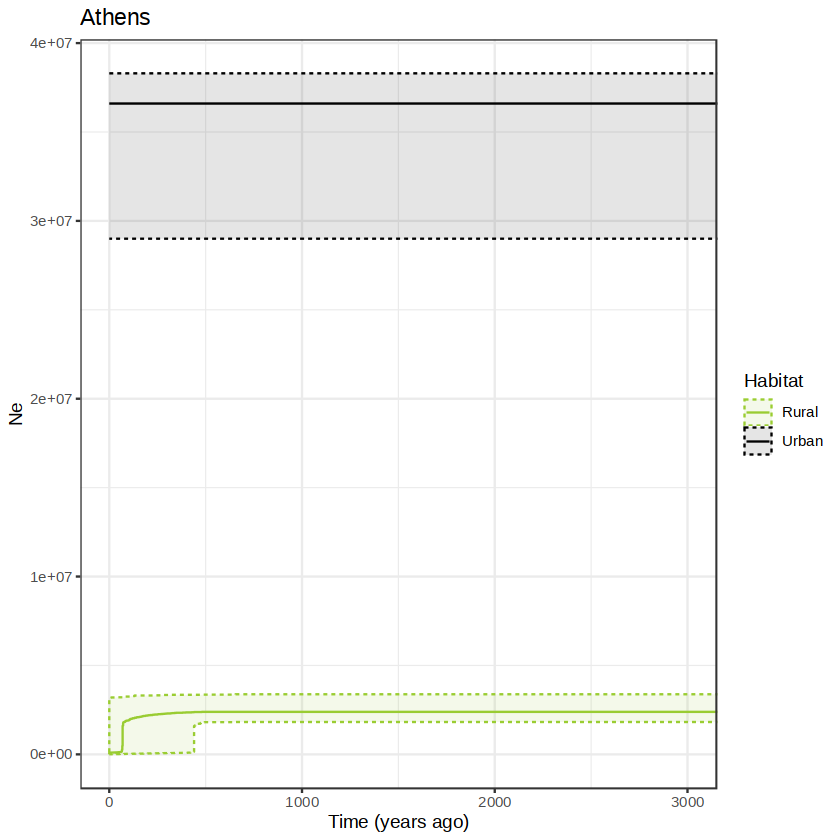

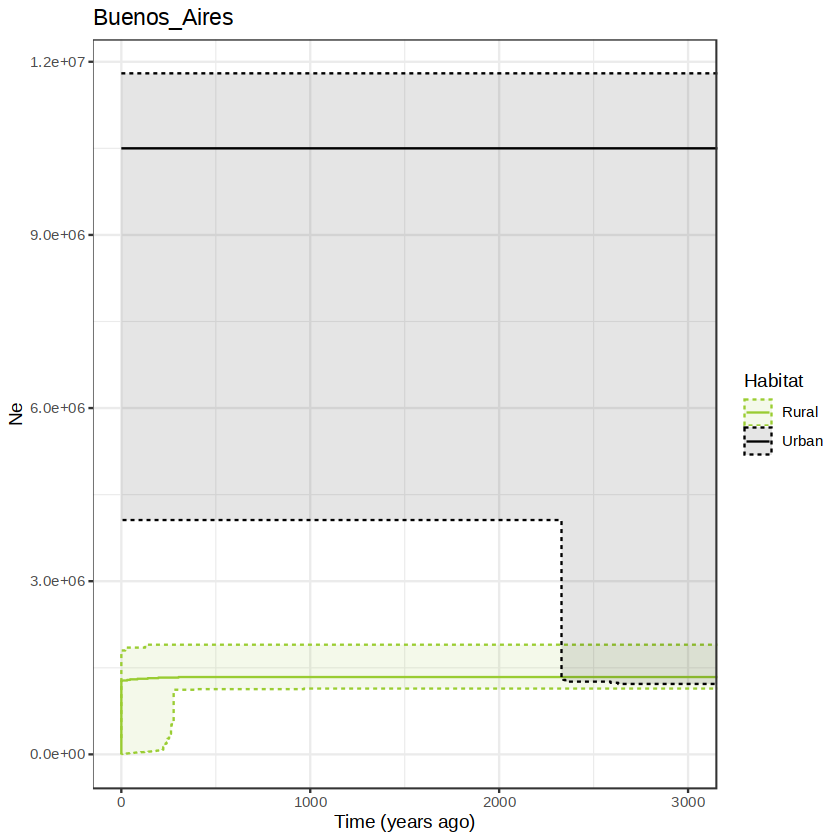

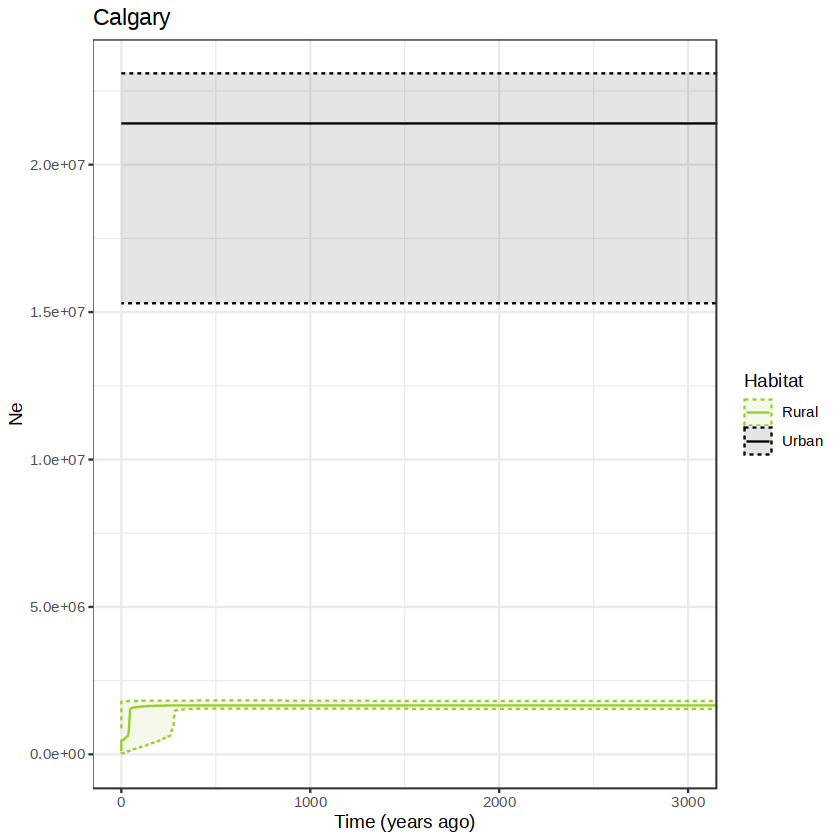

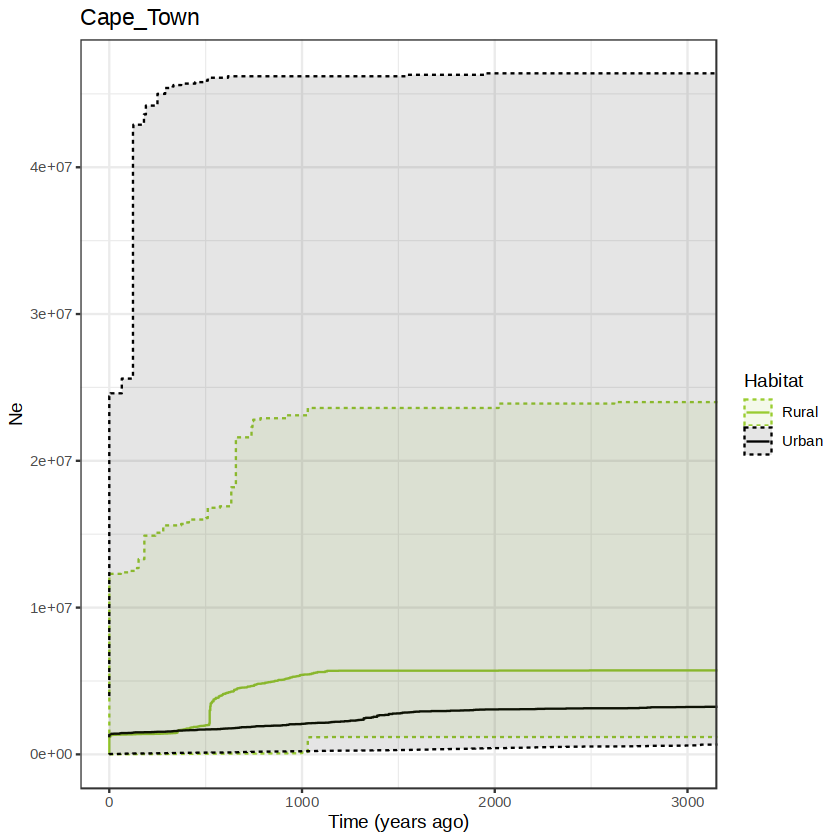

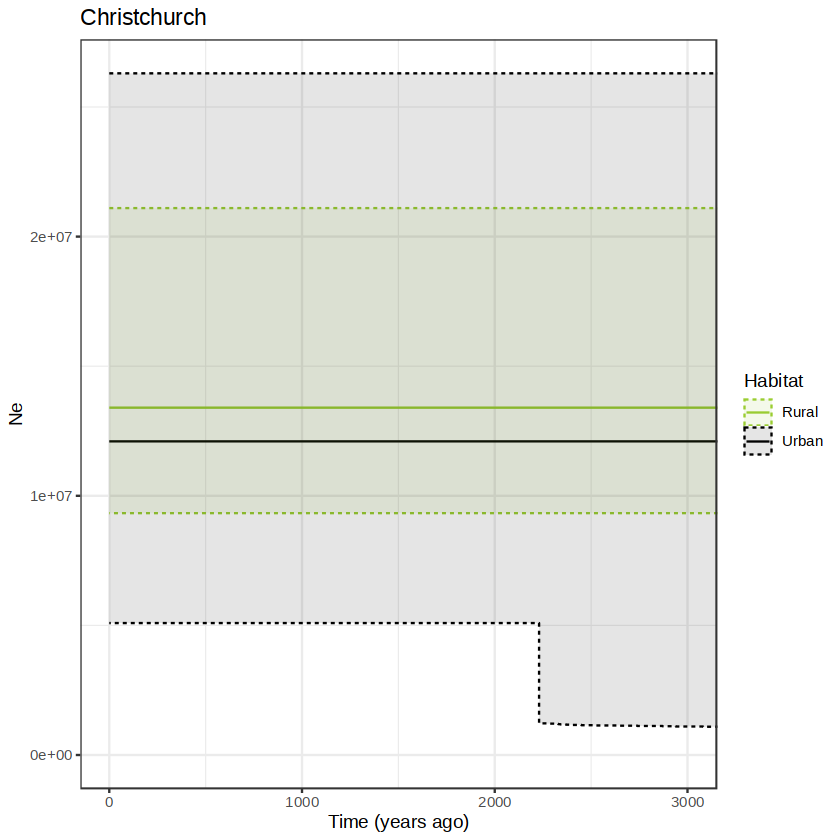

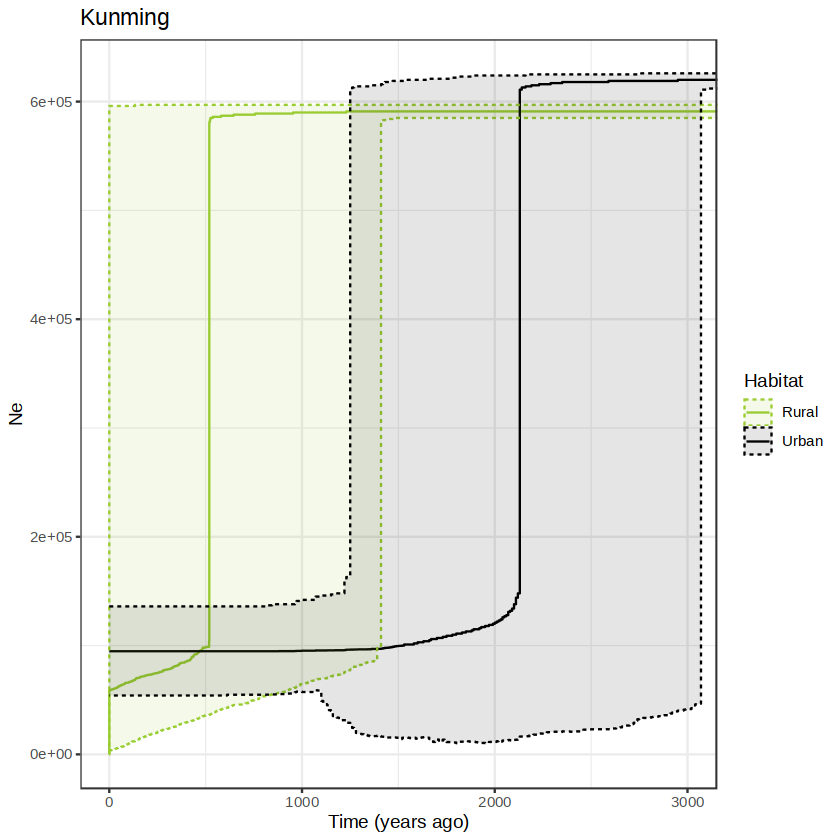

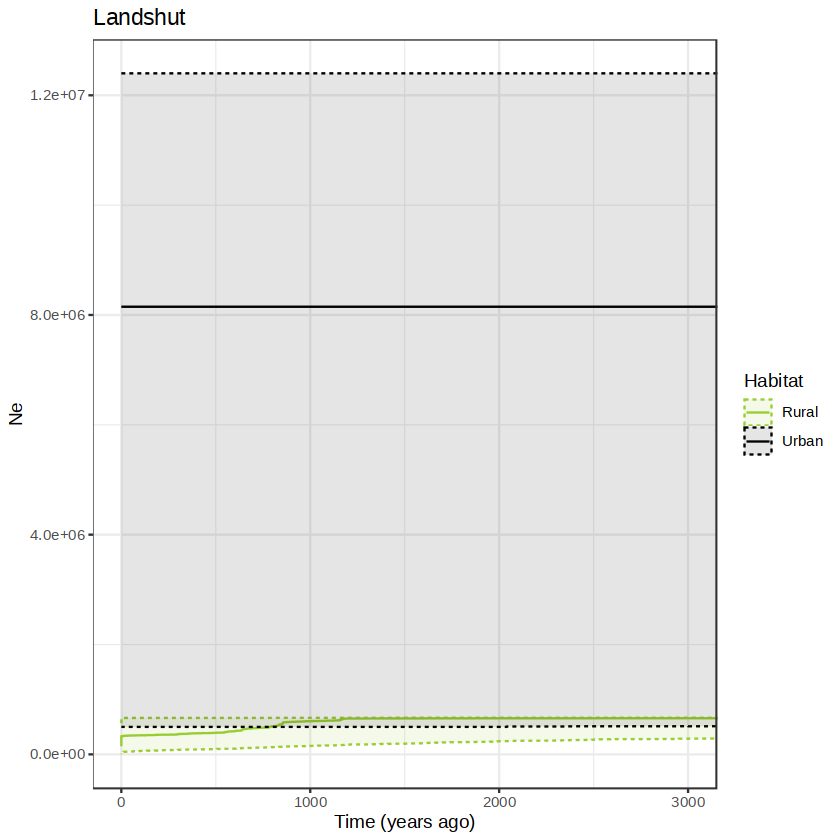

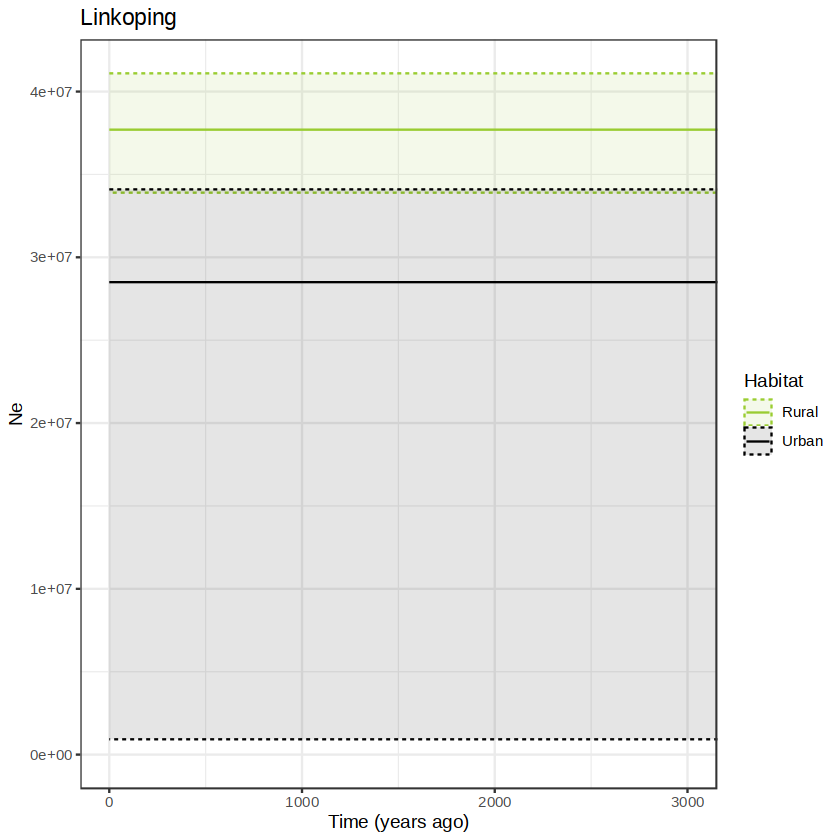

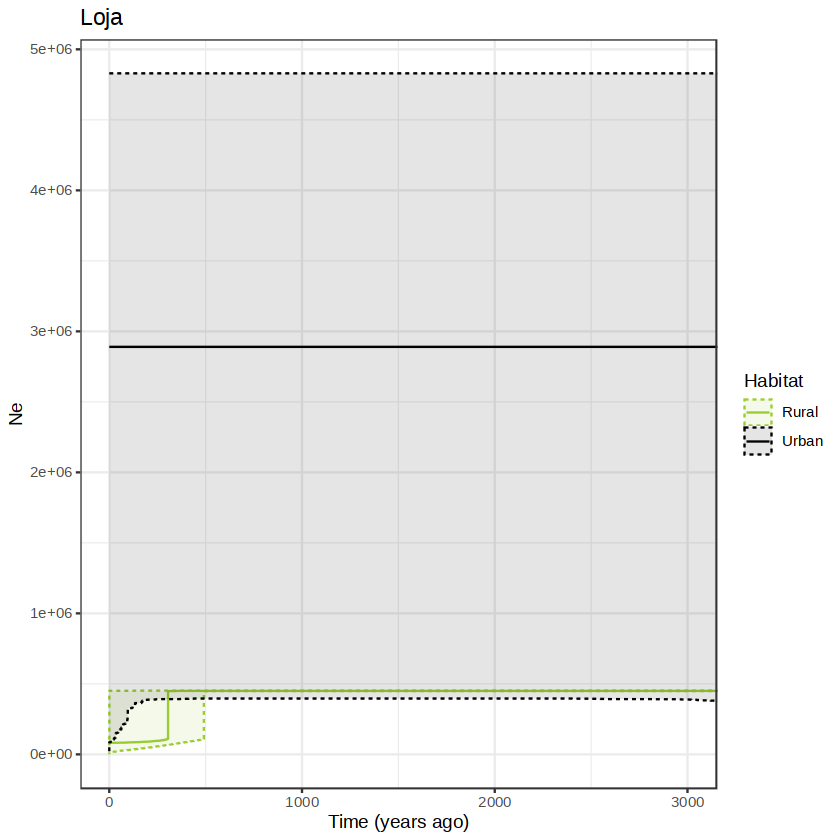

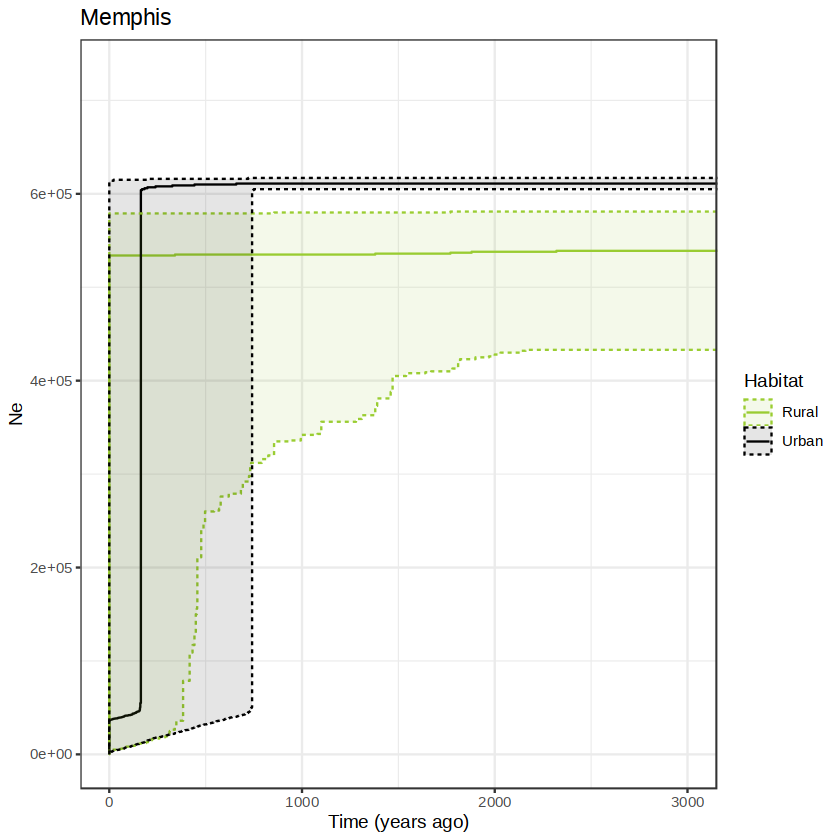

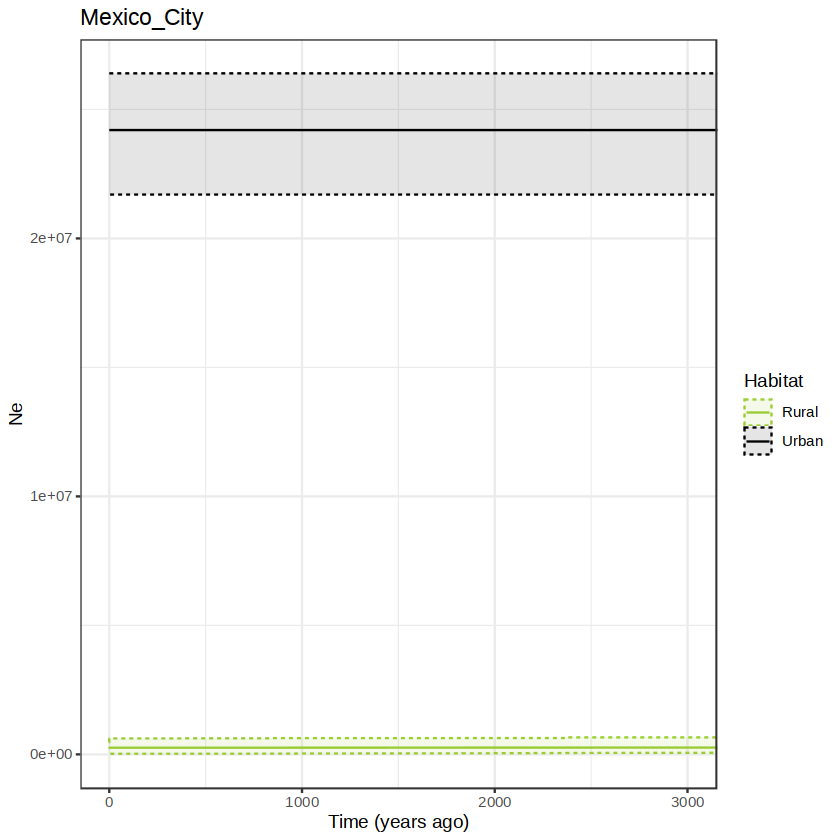

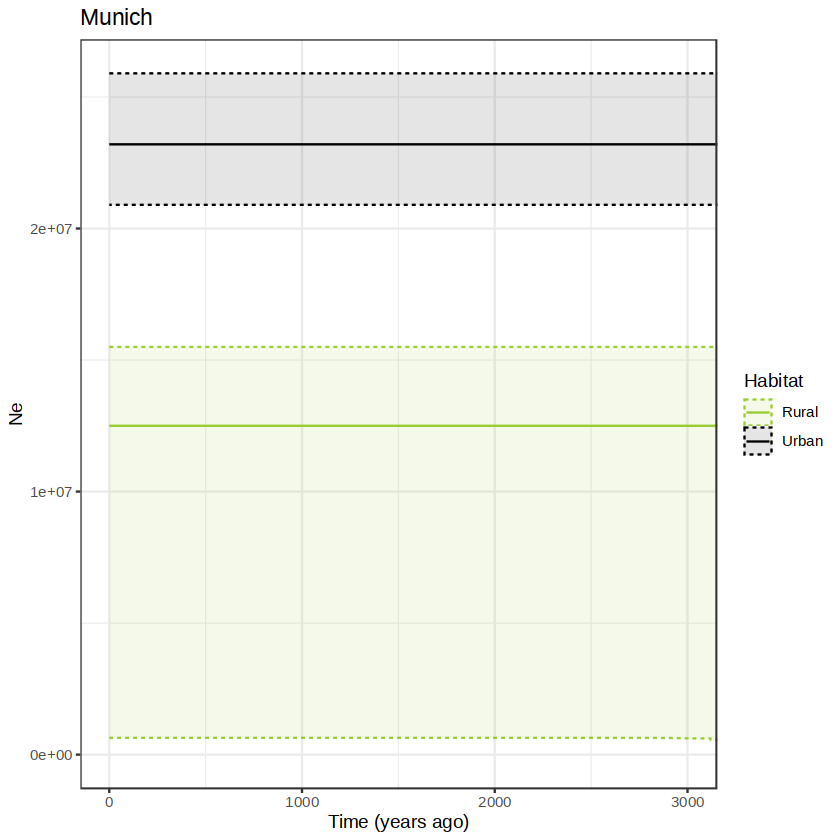

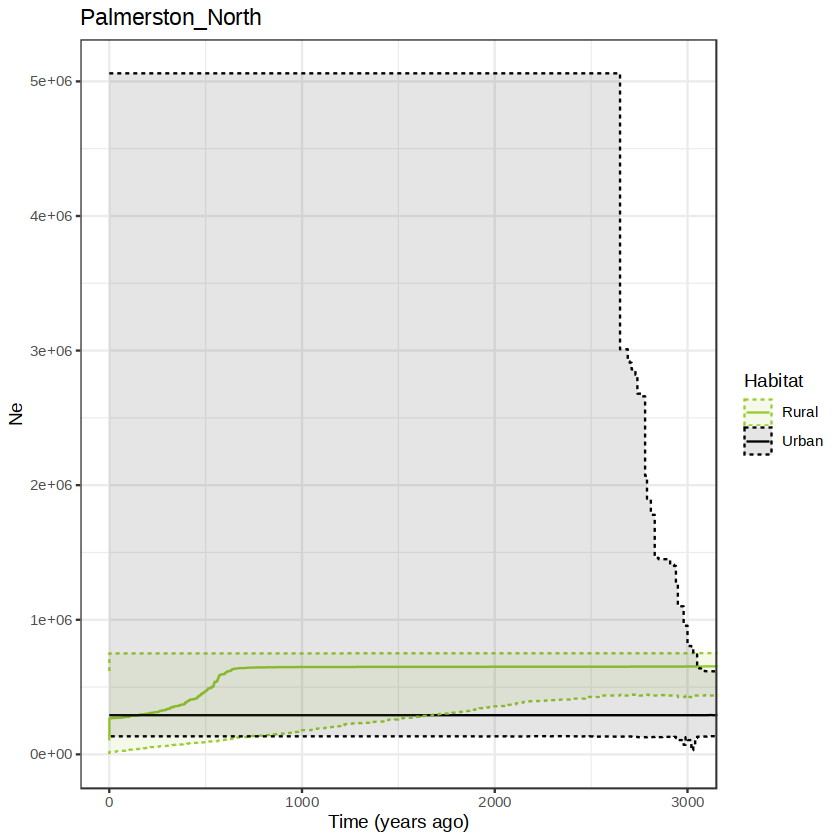

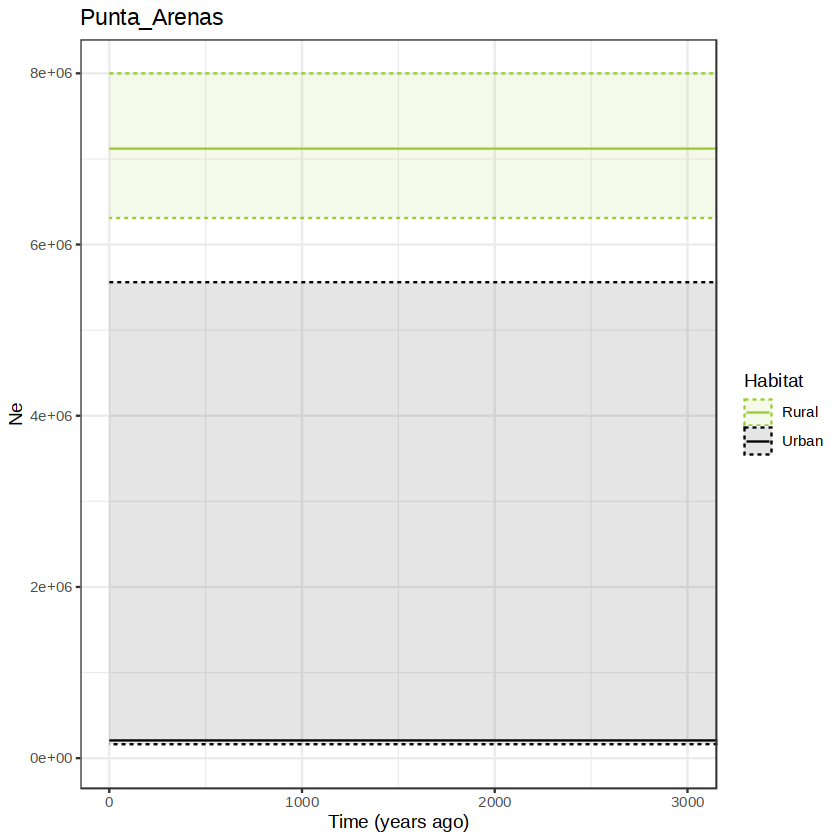

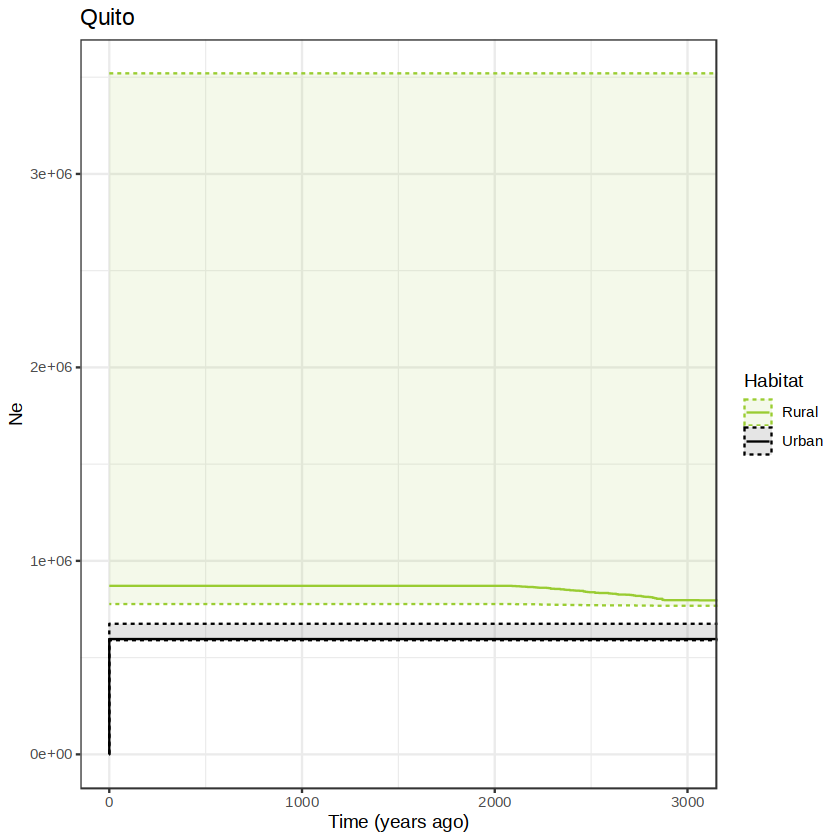

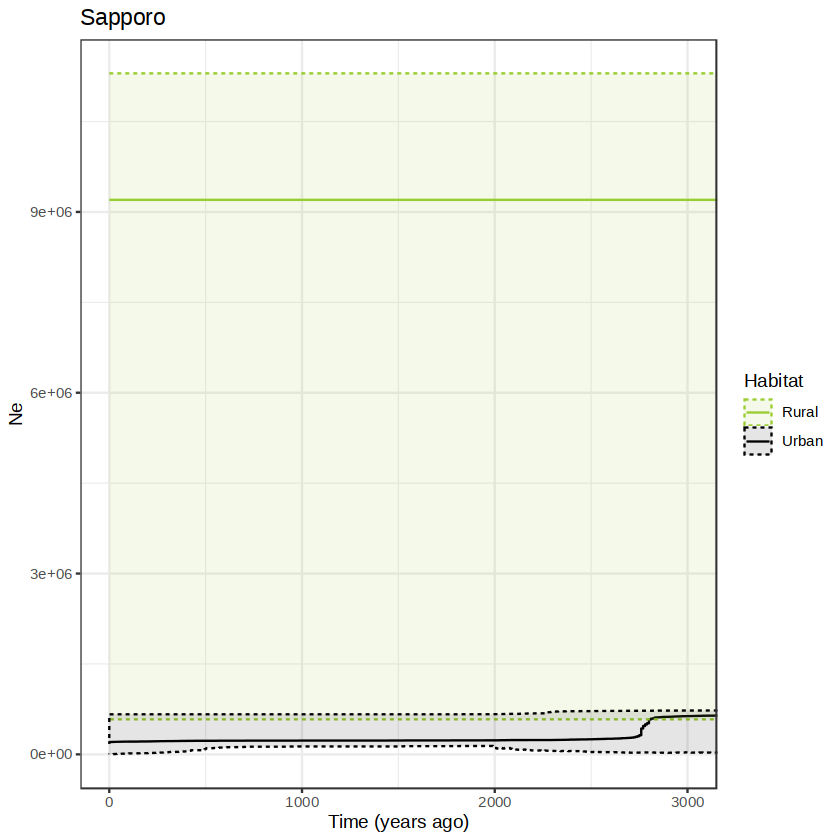

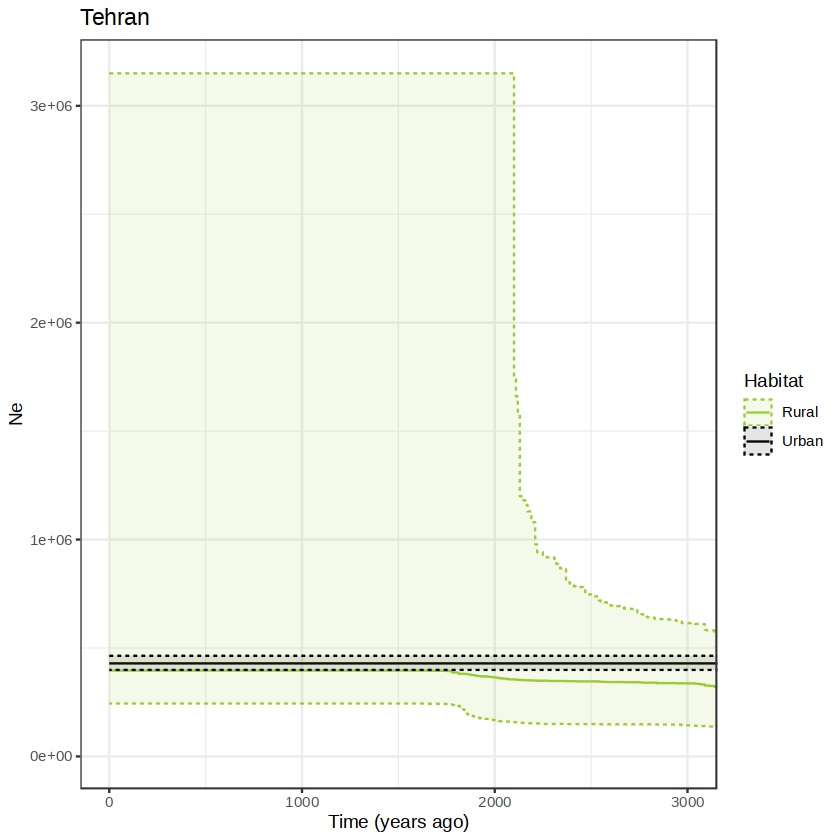

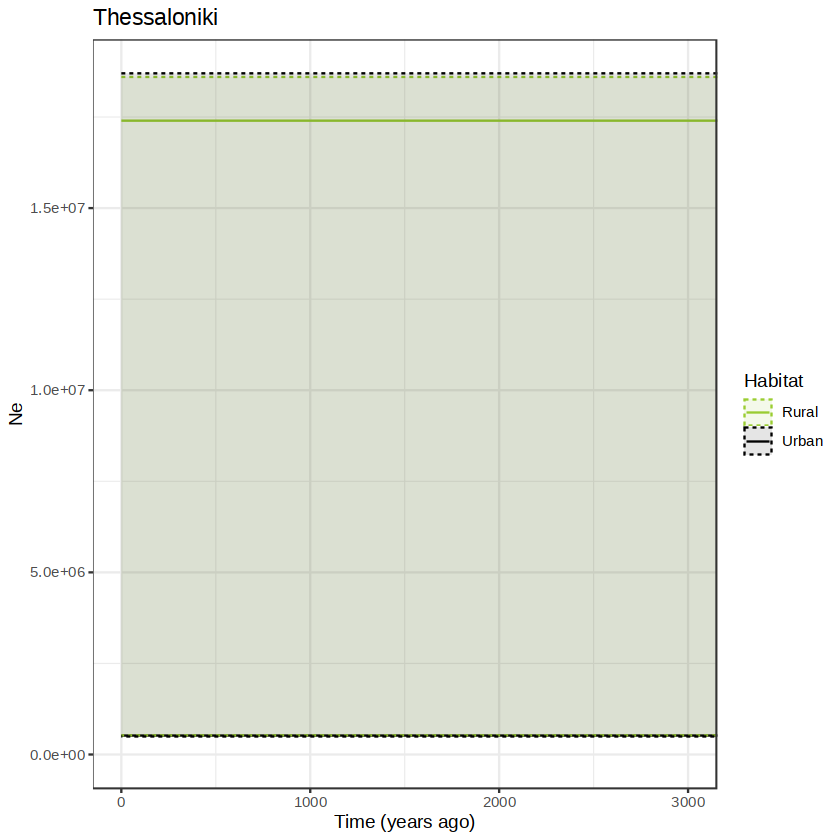

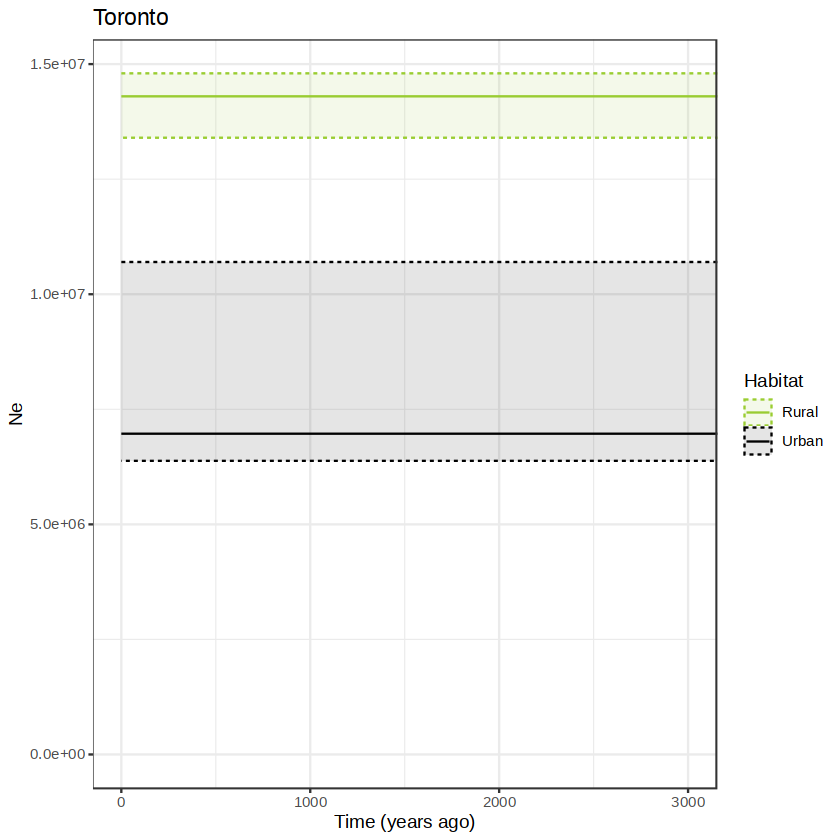

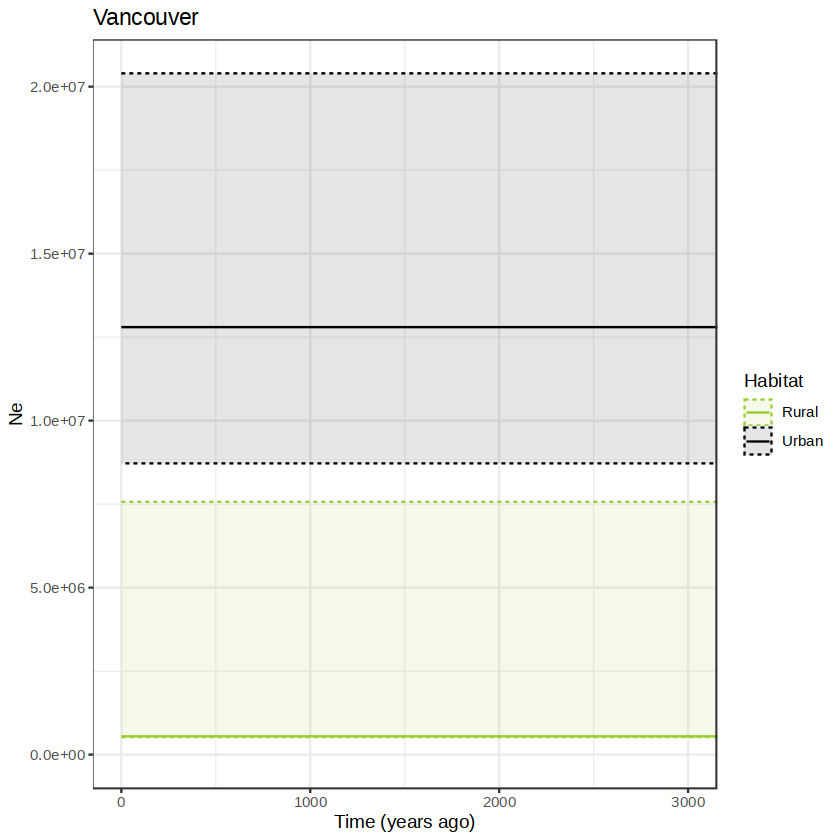

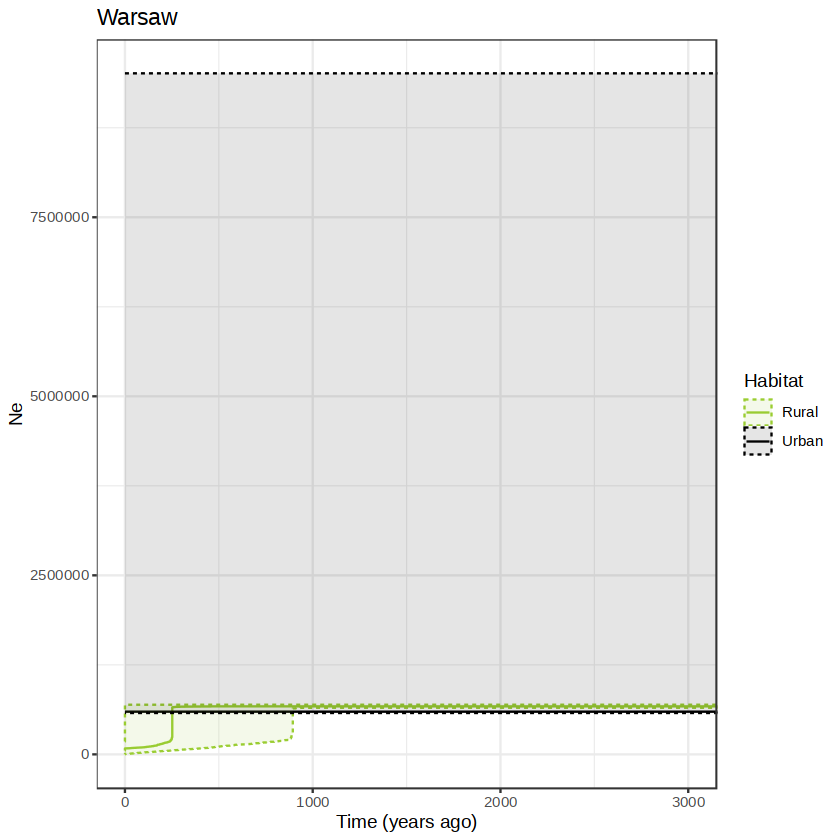

In [2]:
# Making and saving plot of variation in population size per city (both habitats on the same plot)
list<-c("Albuquerque", "Antwerp", "Armidale","Athens","Buenos_Aires",
        "Calgary","Cape_Town","Christchurch","Kunming","Landshut","Linkoping","Loja","Memphis",
        "Mexico_City","Munich","Palmerston_North","Punta_Arenas","Quito","Sapporo","Tehran","Thessaloniki",
        "Toronto","Vancouver","Warsaw")

for (city in list){
  rural_ne <- read.table(paste0("/scratch/projects/trifolium/glue/demography/glue_demography/results/epos/epos/run/",city,"_r_4fold.epos.dat"))
  rural_ne$habitat<-c(rep("Rural",nrow(rural_ne)))
  urban_ne <- read.table(paste0("/scratch/projects/trifolium/glue/demography/glue_demography/results/epos/epos/run/",city,"_u_4fold.epos.dat"))
  urban_ne$habitat<-c(rep("Urban",nrow(urban_ne)))
  full_data<-rbind(rural_ne,urban_ne)
  colnames(full_data)<-c("Time", "LowerQ", "Median", "UpperQ","Habitat")
  p<-ggplot(data=full_data, aes(x=Time, y=Median, colour=Habitat)) +  geom_line() + theme_bw()
  p<-p+geom_ribbon(aes(ymin=LowerQ, ymax=UpperQ, fill= Habitat), linetype=2, alpha=0.1)+coord_cartesian(xlim=c(0,3000))
  p<-p+scale_color_manual(values=c("yellowgreen","black"))+scale_fill_manual(values=c("yellowgreen","black"))
  p<-p+labs(title=get("city"),x ="Time (years ago)", y = "Ne") 
  print(p)
  #ggsave(p,filename=paste("plot_",city,"_epos.png",sep=""),dpi = 300,device=png,width=5.77, height=3.15, units="in",  path = "/scratch/projects/trifolium/glue/demography/glue_demography/genomic-analyses/analyses/figures/epos")

}


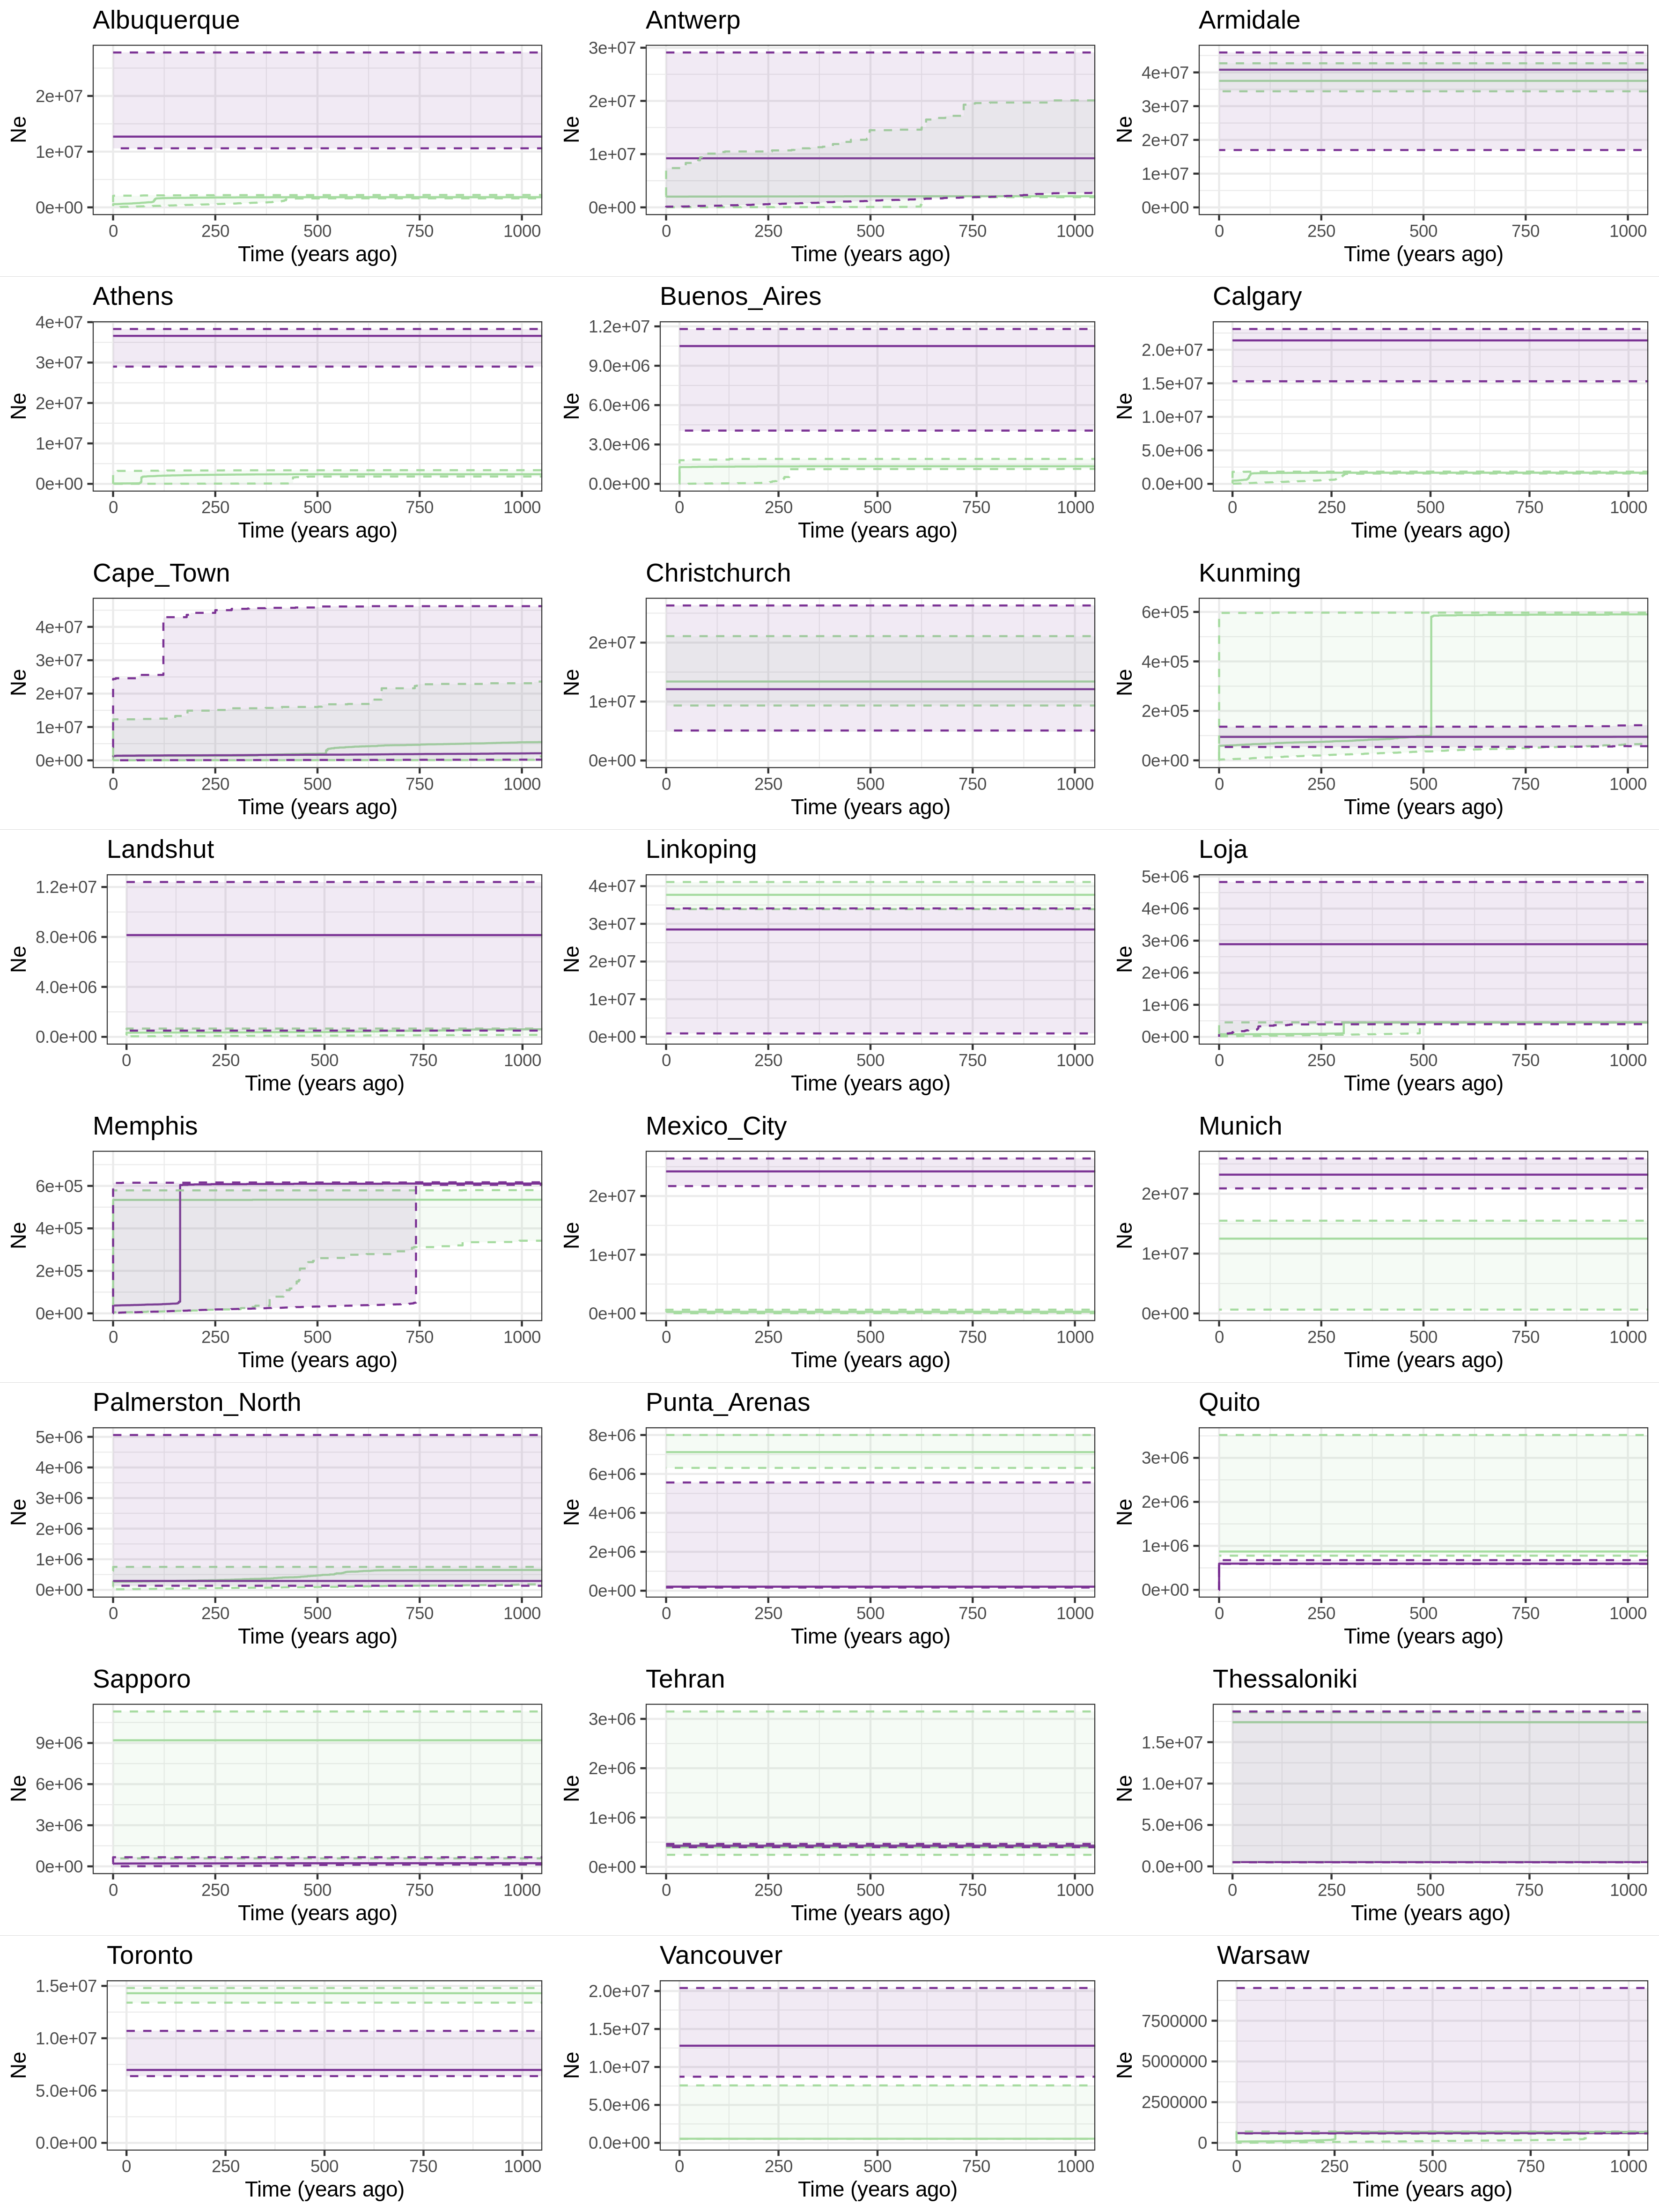

In [5]:
list<-c("Albuquerque", "Antwerp", "Armidale","Athens","Buenos_Aires",
        "Calgary","Cape_Town","Christchurch","Kunming","Landshut","Linkoping","Loja","Memphis",
        "Mexico_City","Munich","Palmerston_North","Punta_Arenas","Quito","Sapporo","Tehran","Thessaloniki",
        "Toronto","Vancouver","Warsaw")

for (city in list){
  rural_ne <- read.table(paste0("/scratch/projects/trifolium/glue/demography/glue_demography/results/epos/epos/run/",city,"_r_4fold.epos.dat"))
  rural_ne$habitat<-c(rep("Rural",nrow(rural_ne)))
  urban_ne <- read.table(paste0("/scratch/projects/trifolium/glue/demography/glue_demography/results/epos/epos/run/",city,"_u_4fold.epos.dat"))
  urban_ne$habitat<-c(rep("Urban",nrow(urban_ne)))
  full_data<-rbind(rural_ne,urban_ne)
  colnames(full_data)<-c("Time", "LowerQ", "Median", "UpperQ","Habitat")
  p<-ggplot(data=full_data, aes(x=Time, y=Median, colour=Habitat)) +  geom_line() + theme_bw()
  p<-p+geom_ribbon(aes(ymin=LowerQ, ymax=UpperQ, fill= Habitat), linetype=2, alpha=0.1)+coord_cartesian(xlim=c(0,1000))
  p<-p+scale_color_manual(values=c("#a6dba0","#7b3294"))+scale_fill_manual(values=c("#a6dba0","#7b3294"))
  p<-p+labs(title=get("city"),x ="Time (years ago)", y = "Ne")+ theme(legend.position = "none")
  name <-paste0(city,'_plot')
  assign(name,p)
  #ggsave(p,filename=paste("plot_",city,"_epos.png",sep=""),dpi = 300,device=png,width=5.77, height=3.15, units="in",  path = "/scratch/projects/trifolium/glue/demography/glue_demography/genomic-analyses/analyses/figures/epos")

}

pi_combined<-ggarrange(Albuquerque_plot,Antwerp_plot,Armidale_plot,Athens_plot,
                       Buenos_Aires_plot,Calgary_plot,Cape_Town_plot,Christchurch_plot,
                       Kunming_plot,Landshut_plot,Linkoping_plot,Loja_plot,
                       Memphis_plot,Mexico_City_plot,Munich_plot,Palmerston_North_plot,
                       Punta_Arenas_plot,Quito_plot,Sapporo_plot,Tehran_plot,
                       Thessaloniki_plot,Toronto_plot,Vancouver_plot,Warsaw_plot,
                       ncol=3,nrow=8)

            
ggsave(
    "epos_pannel.png",
    plot= pi_combined,
    device = png,
    path = "/scratch/projects/trifolium/glue/demography/glue_demography/genomic-analyses/analyses/figures/epos",
    width = 30,
    height = 40,
    units = "cm",
    dpi = 300
    )
path_to_eposplot<-"/scratch/projects/trifolium/glue/demography/glue_demography/genomic-analyses/analyses/figures/epos/epos_pannel.png"
display_png(file=path_to_eposplot)


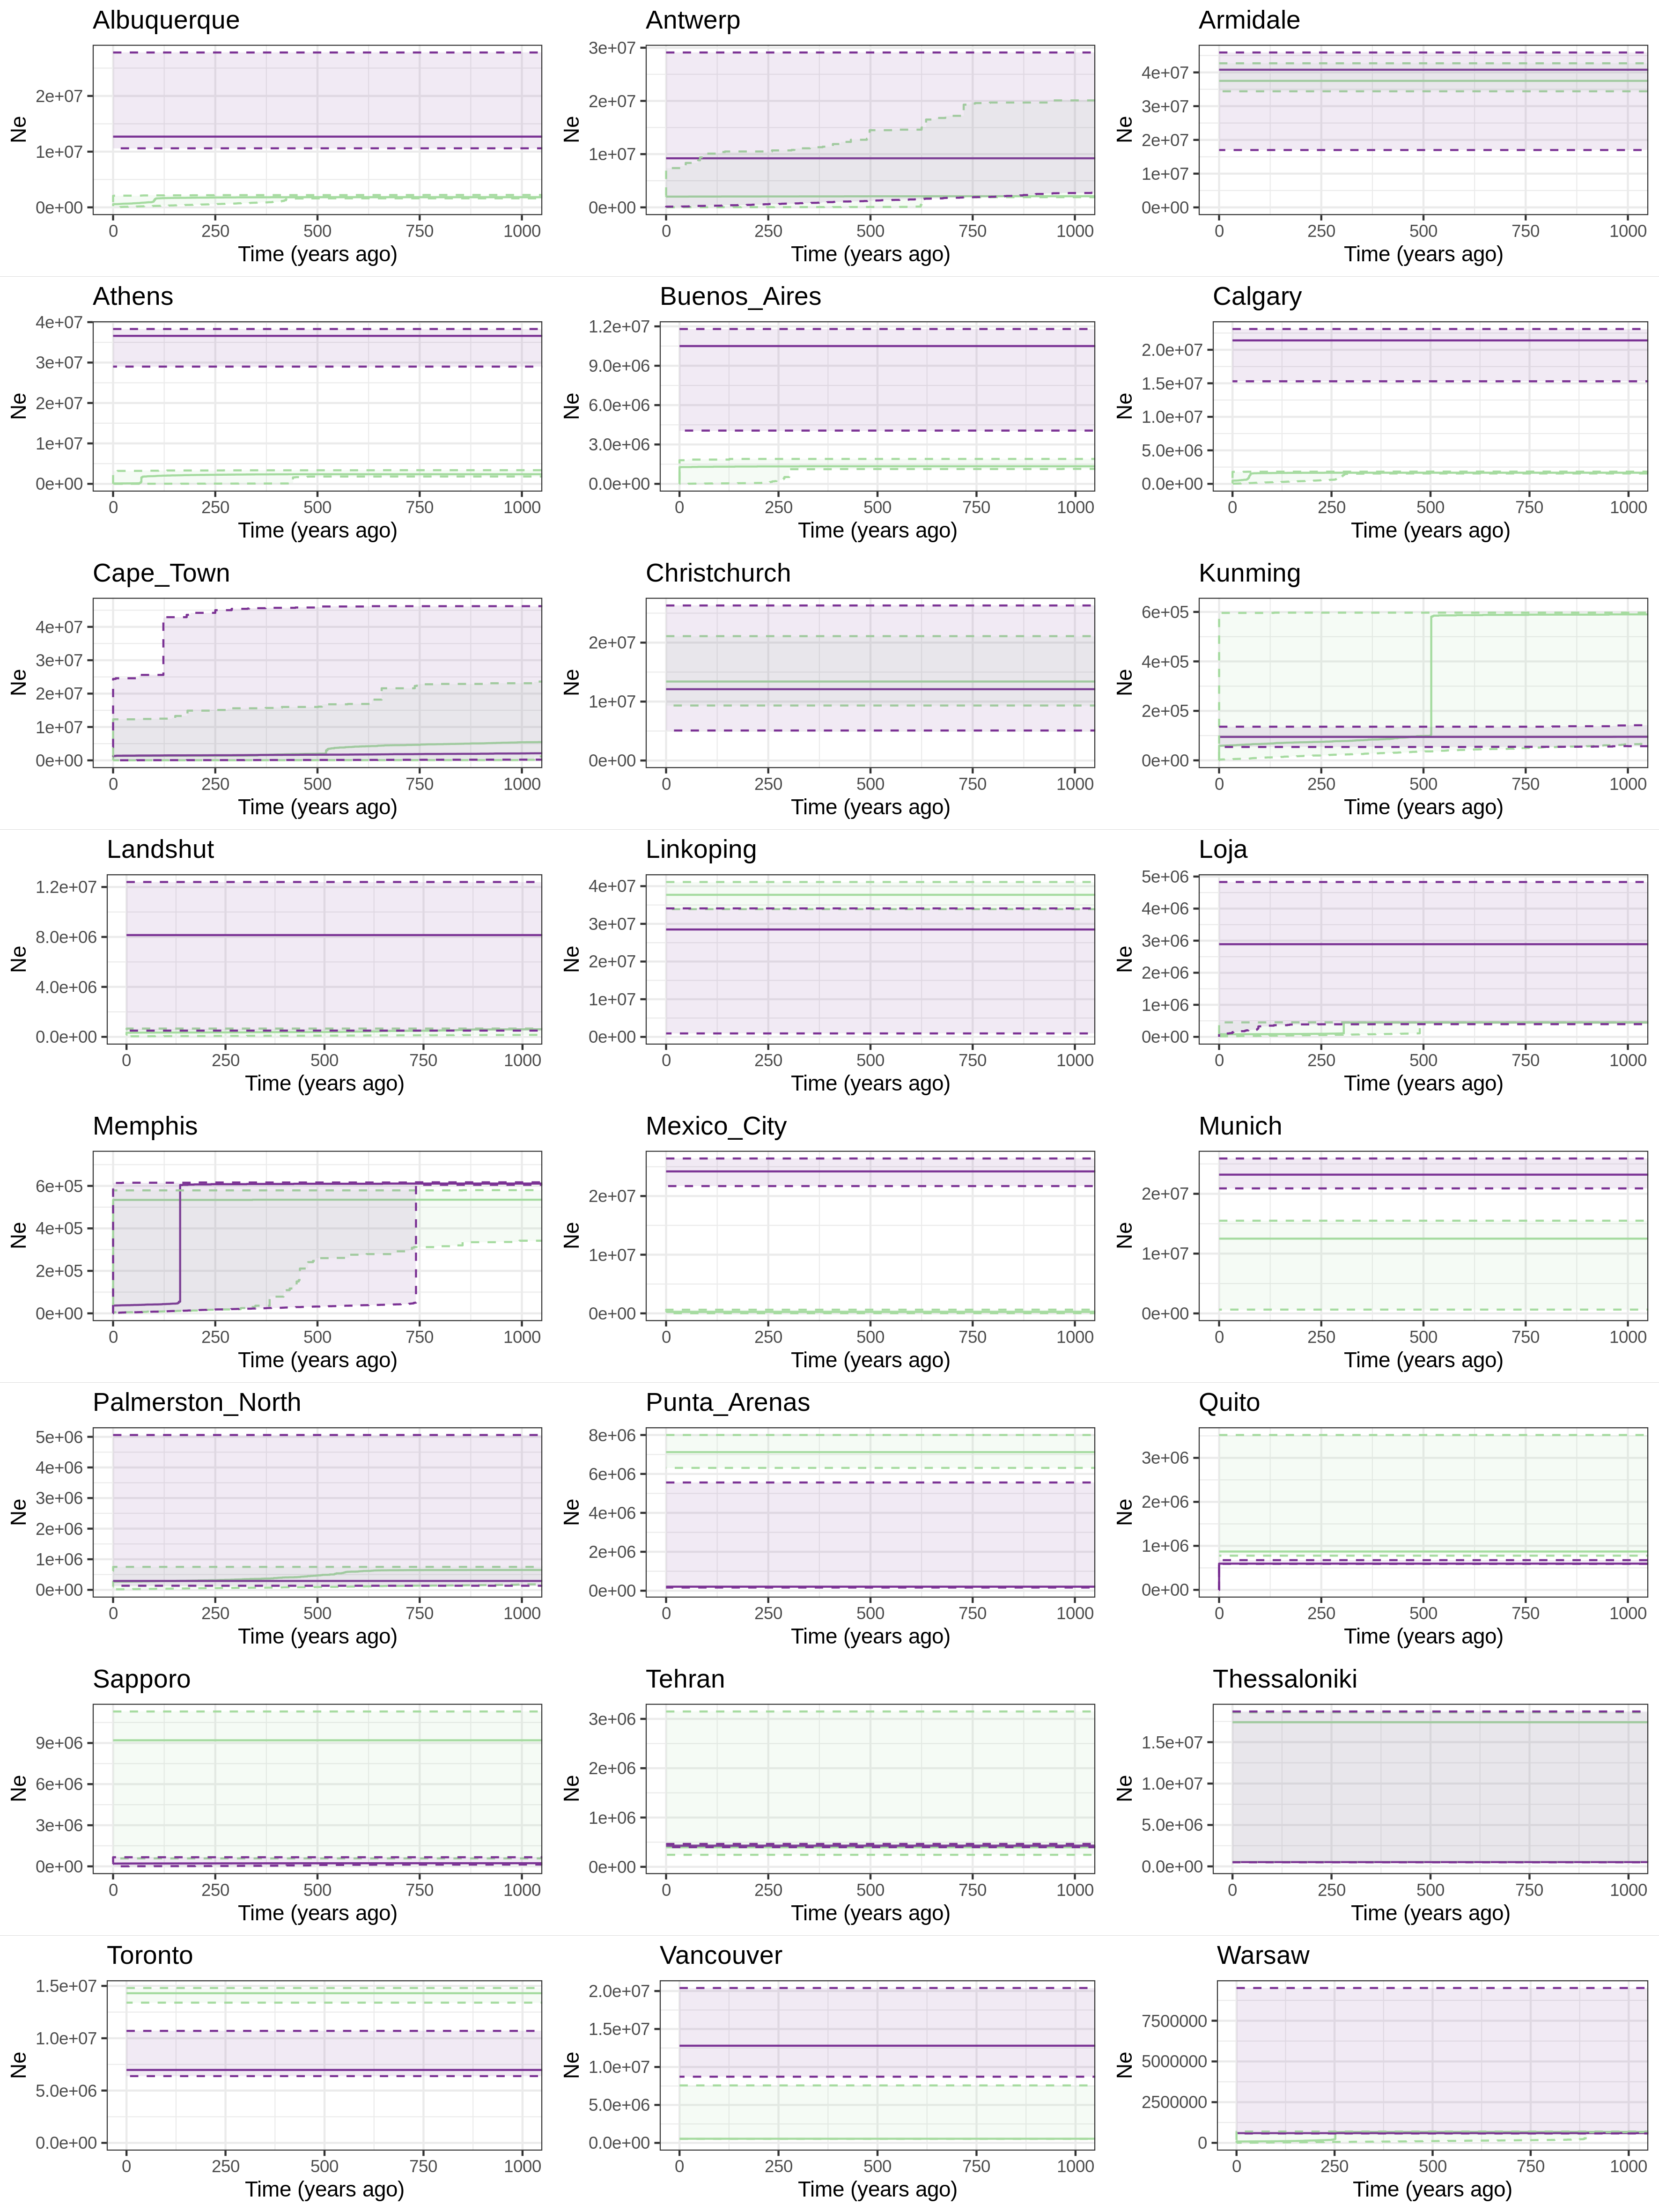

In [6]:
list<-c("Albuquerque", "Antwerp", "Armidale","Athens","Buenos_Aires",
        "Calgary","Cape_Town","Christchurch","Kunming","Landshut","Linkoping","Loja","Memphis",
        "Mexico_City","Munich","Palmerston_North","Punta_Arenas","Quito","Sapporo","Tehran","Thessaloniki",
        "Toronto","Vancouver","Warsaw")

for (city in list){
  rural_ne <- read.table(paste0("/scratch/projects/trifolium/glue/demography/glue_demography/results/epos/epos/run/",city,"_r_4fold.epos.dat"))
  rural_ne$habitat<-c(rep("Rural",nrow(rural_ne)))
  urban_ne <- read.table(paste0("/scratch/projects/trifolium/glue/demography/glue_demography/results/epos/epos/run/",city,"_u_4fold.epos.dat"))
  urban_ne$habitat<-c(rep("Urban",nrow(urban_ne)))
  full_data<-rbind(rural_ne,urban_ne)
  colnames(full_data)<-c("Time", "LowerQ", "Median", "UpperQ","Habitat")
  p<-ggplot(data=full_data, aes(x=Time, y=Median, colour=Habitat)) +  geom_line() + theme_bw()
  p<-p+geom_ribbon(aes(ymin=LowerQ, ymax=UpperQ, fill= Habitat), linetype=2, alpha=0.1)+coord_cartesian(xlim=c(0,1000))
  p<-p+scale_color_manual(values=c("#a6dba0","#7b3294"))+scale_fill_manual(values=c("#a6dba0","#7b3294"))
  p<-p+labs(title=get("city"),x ="Time (years ago)", y = "Ne")+ theme(legend.position = "none")
  name <-paste0(city,'_plot')
  assign(name,p)
  #ggsave(p,filename=paste("plot_",city,"_epos.png",sep=""),dpi = 300,device=png,width=5.77, height=3.15, units="in",  path = "/scratch/projects/trifolium/glue/demography/glue_demography/genomic-analyses/analyses/figures/epos")

}

pi_combined<-ggarrange(Albuquerque_plot,Antwerp_plot,Armidale_plot,Athens_plot,
                       Buenos_Aires_plot,Calgary_plot,Cape_Town_plot,Christchurch_plot,
                       Kunming_plot,Landshut_plot,Linkoping_plot,Loja_plot,
                       Memphis_plot,Mexico_City_plot,Munich_plot,Palmerston_North_plot,
                       Punta_Arenas_plot,Quito_plot,Sapporo_plot,Tehran_plot,
                       Thessaloniki_plot,Toronto_plot,Vancouver_plot,Warsaw_plot,
                       ncol=3,nrow=8)

            
ggsave(
    "epos_pannel_1000.png",
    plot= pi_combined,
    device = png,
    path = "/scratch/projects/trifolium/glue/demography/glue_demography/genomic-analyses/analyses/figures/epos",
    width = 30,
    height = 40,
    units = "cm",
    dpi = 300
    )
path_to_eposplot<-"/scratch/projects/trifolium/glue/demography/glue_demography/genomic-analyses/analyses/figures/epos/epos_pannel_1000.png"
display_png(file=path_to_eposplot)


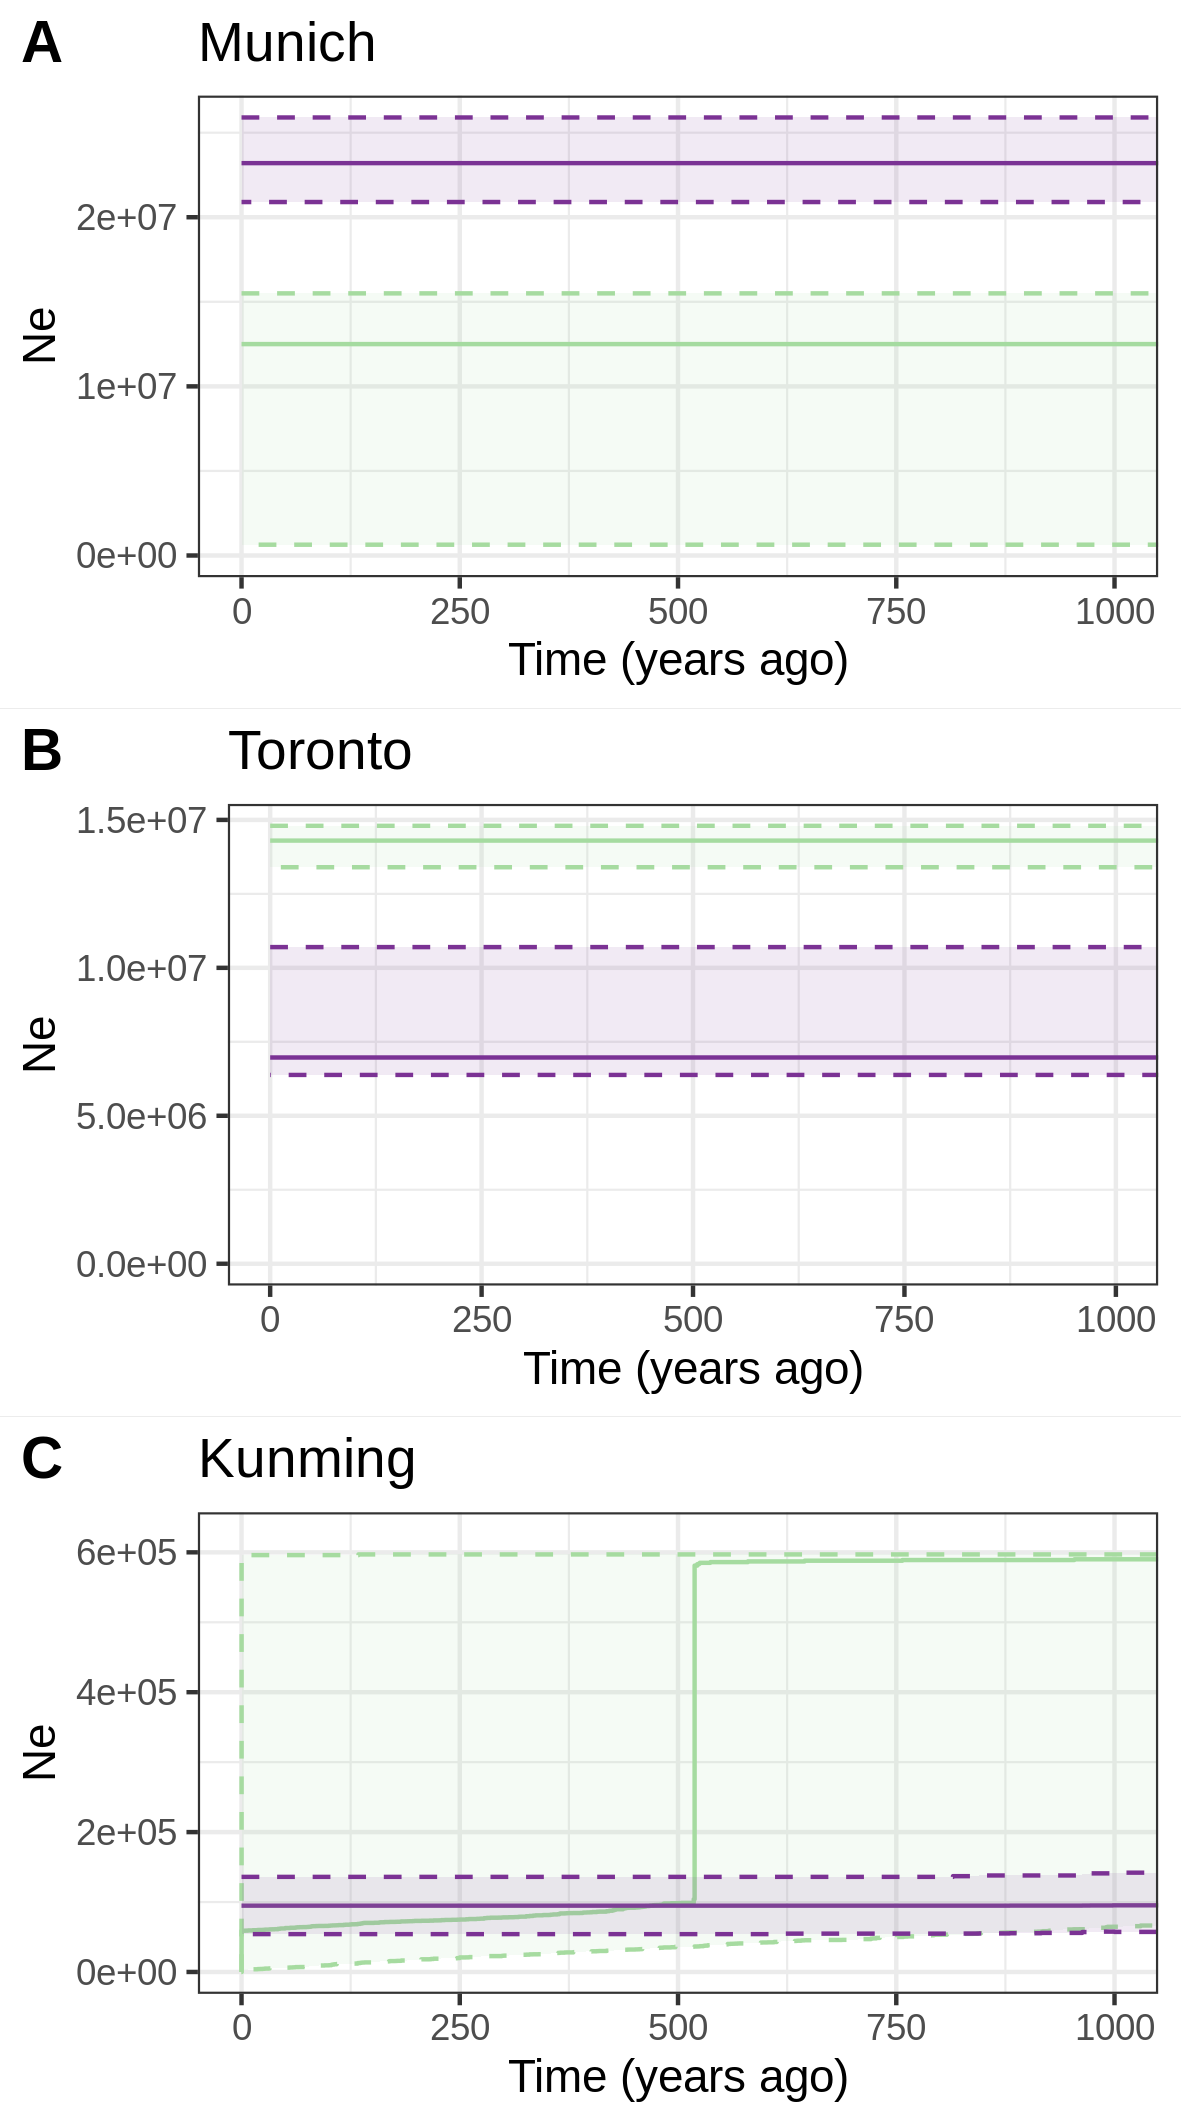

In [3]:
list<-c("Kunming","Munich","Toronto")

for (city in list){
  rural_ne <- read.table(paste0("/scratch/projects/trifolium/glue/demography/glue_demography/results/epos/epos/run/",city,"_r_4fold.epos.dat"))
  rural_ne$habitat<-c(rep("Rural",nrow(rural_ne)))
  urban_ne <- read.table(paste0("/scratch/projects/trifolium/glue/demography/glue_demography/results/epos/epos/run/",city,"_u_4fold.epos.dat"))
  urban_ne$habitat<-c(rep("Urban",nrow(urban_ne)))
  full_data<-rbind(rural_ne,urban_ne)
  colnames(full_data)<-c("Time", "LowerQ", "Median", "UpperQ","Habitat")
  p<-ggplot(data=full_data, aes(x=Time, y=Median, colour=Habitat)) +  geom_line() + theme_bw()
  p<-p+geom_ribbon(aes(ymin=LowerQ, ymax=UpperQ, fill= Habitat), linetype=2, alpha=0.1)+coord_cartesian(xlim=c(0,1000))
  p<-p+scale_color_manual(values=c("#a6dba0","#7b3294"))+scale_fill_manual(values=c("#a6dba0","#7b3294"))
  p<-p+labs(title=get("city"),x ="Time (years ago)", y = "Ne")+ theme(legend.position = "none")
  name <-paste0(city,'_plot')
  assign(name,p)
  #ggsave(p,filename=paste("plot_",city,"_epos.png",sep=""),dpi = 300,device=png,width=5.77, height=3.15, units="in",  path = "/scratch/projects/trifolium/glue/demography/glue_demography/genomic-analyses/analyses/figures/epos")

}

panel<-ggarrange(Munich_plot,Toronto_plot,Kunming_plot,
                       ncol=1,nrow=3,labels=c("A","B","C"))

            
ggsave(
    "epos_examples.png",
    plot= panel,
    device = png,
    path = "/scratch/projects/trifolium/glue/demography/glue_demography/genomic-analyses/analyses/figures/epos",
    width = 10,
    height = 18,
    units = "cm",
    dpi = 300
    )
path_to_eposplot<-"/scratch/projects/trifolium/glue/demography/glue_demography/genomic-analyses/analyses/figures/epos/epos_examples.png"
display_png(file=path_to_eposplot)


### Table preparation

In [3]:
# loading the file with all current population sizes
ne_tot<-read.table(paste0("/scratch/projects/trifolium/glue/demography/glue_demography/results/epos/epos/run/ne_current_data.txt"))
colnames(ne_tot)<-c("Time","LowerQ", "Median", "UpperQ","City","Habitat")

ne_tot$City<-gsub('Buenos', "Buenos_Aires", ne_tot$City)
ne_tot$City<-gsub('Cape', 'Cape_Town', ne_tot$City)
ne_tot$City<-gsub('Mexico', 'Mexico_City', ne_tot$City)
ne_tot$City<-gsub('Palmerston', 'Palmerston_North', ne_tot$City)
ne_tot$City<-gsub('Punta', 'Punta_Arenas', ne_tot$City)

# Merging with details in the sample_sheet
sample_sheet<-read.csv("/scratch/projects/trifolium/glue/demography/glue_demography/genomic-analyses/resources/glue_noLowCities_sampleSheet_noRelated.txt", header=TRUE, sep="\t")
city_detail<-distinct(sample_sheet, city, .keep_all= TRUE)
ne<-merge(ne_tot,city_detail, by.x="City", by.y="city", all.x=TRUE, all.y=FALSE)
#ne
#write_csv(ne, 'ne_current_details.csv')
ne$City<-sub("Cape_Town", "Cape Town", ne$City)
ne$City<-sub("Buenos_Aires", "Buenos Aires", ne$City)
ne$City<-sub("Mexico_City", "Mexico City", ne$City)
ne$City<-sub("Palmerston_North", "Palmerston N", ne$City)
ne$City<-sub("Punta_Arenas", "Punta Arenas", ne$City)
ne$continent<-sub("EU", "EUROPE", ne$continent)
ne$continent<-sub("ASI", "ASIA", ne$continent)
ne$continent<-sub("AFR", "AFR", ne$continent)
ne$continent<-sub("NAM", "NORTH AM.", ne$continent)
ne$continent<-sub("SAM", "SOUTH AM.", ne$continent)
ne$continent<-sub("OCE", "OCEANIA", ne$continent)
level_order <- c('Antwerp', 'Landshut', 'Linkoping','Munich','Thessaloniki','Warsaw',
                 'Tehran','Kunming','Sapporo','Cape Town',
                 'Albuquerque','Athens','Calgary','Memphis','Mexico City', 'Toronto', 'Vancouver',
                 'Buenos Aires','Loja','Punta Arenas','Quito',
                 'Armidale','Christchurch','Palmerston N') 

ne$continent_order<-factor(ne$continent, levels=c('EUROPE','ASIA','AFR','NORTH AM.','SOUTH AM.','OCEANIA'))


Warning message:
“The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”
Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Warning message:
“The `size` argument of `element_rect()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


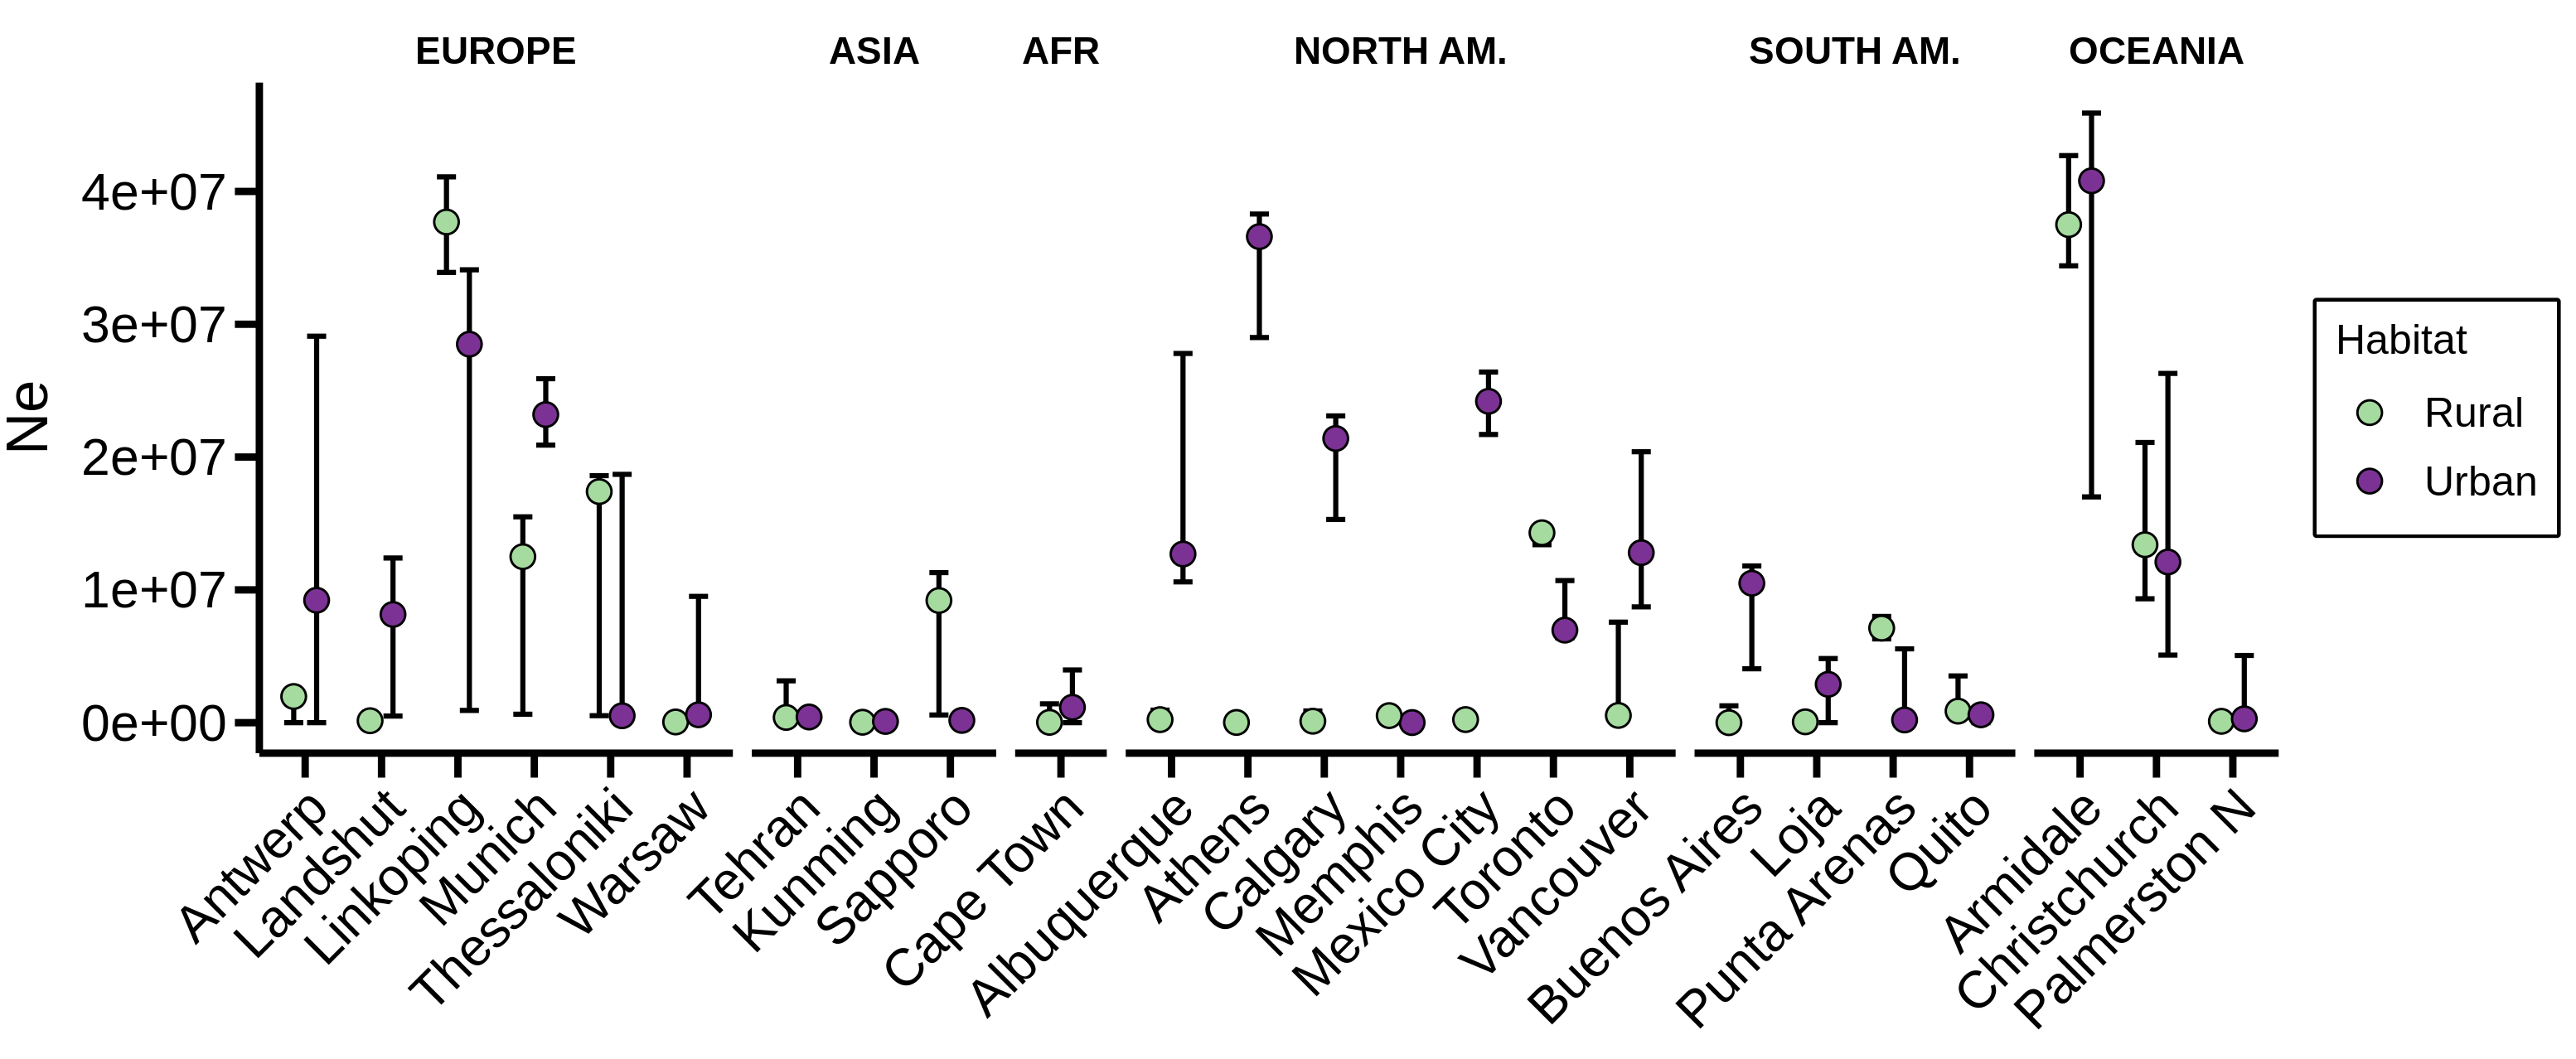

In [4]:
ng2 <- theme(panel.background = element_blank(),
             #aspect.ratio=0.5,
             panel.grid.major = element_blank(),
             panel.grid.minor = element_blank(),
             panel.border=element_blank(),
             axis.line.x = element_line(color="black",size=1),
             axis.line.y = element_line(color="black",size=1),
             axis.ticks=element_line(size = 1, color="black"),
             axis.ticks.length=unit(0.25, 'cm'),
             axis.text=element_text(color="black",size=15),
             axis.title=element_text(color="black",size=1),
             axis.title.y=element_text(vjust=2,size=17),
             #axis.title.x=element_text(vjust=0.1,size=17),
             axis.text.x=element_text(size=15,angle = 45,hjust = 1),
             axis.text.y=element_text(size=15),
             strip.text.x = element_text(size = 10, colour = "black",face = "bold"),
             strip.background = element_rect(colour="black"),
             axis.title.x=element_blank(),
             legend.position = "top", 
             legend.direction="horizontal",
             legend.text=element_text(size=15), legend.key = element_rect(fill = "white"),
             legend.title = element_text(size=15),legend.key.size = unit(0.7, "cm"))

urban_col <- "#7b3294"
rural_col <- "#a6dba0"
cols <- c(urban_col, rural_col)
ne_by_city_by_habitat <- ne %>% 
  ggplot(., aes(x = factor(City, level = level_order), y = Median, fill = Habitat)) +
  geom_errorbar(aes(ymax = UpperQ, ymin = LowerQ), width = 0.5, size = 0.7, position=position_dodge(width = 0.6)) +
  geom_point(size = 3, shape = 21, position=position_dodge(width = 0.6)) +
  scale_fill_manual(values = rev(cols), labels = c('Rural', 'Urban'), name="Habitat") +
  facet_grid(~continent_order,scales="free_x", space="free_x")+
  #facet_wrap(~continent_order,scales="free_x", space="free_x")+
  #scale_y_continuous(breaks=c(0.02,0.03,0.04),
   #                  limits = c(0.015,0.043))+
  ylab('Ne') +
  ng2 +
  theme(strip.placement ="outside", 
        strip.background=element_rect(colour="white",fill="white"),
        strip.text.x=element_text(size=11))+
  theme(legend.position = "right",
        legend.direction="vertical",
        legend.box.background = element_rect(colour = "black",size=1),
        legend.text=element_text(size=12),
        legend.title=element_text(size=12))

ggsave(ne_by_city_by_habitat,
    path="/scratch/projects/trifolium/glue/demography/glue_demography/genomic-analyses/analyses/figures/",
    filename="ne_by_city_by_habitat.png", width = 10.36, height = 4.26, unit="in")
display_png(file="/scratch/projects/trifolium/glue/demography/glue_demography/genomic-analyses/analyses/figures/ne_by_city_by_habitat.png")


In [8]:
head(ne)
min(as.numeric(ne$Median))
max(as.numeric(ne$Median))

,City,Time,LowerQ,Median,UpperQ,Habitat,continent,pop,individual,site,sample,range,library,lane,city_pop,continent_order
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<fct>
1,Albuquerque,0,1,228000,947000,rural,NORTH AM.,29,5,r,Albuquerque_29_5,Introduced,glue_low1,1,Albuquerque_.29,NORTH AM.
2,Albuquerque,0,10600000,12700000,27800000,urban,NORTH AM.,29,5,r,Albuquerque_29_5,Introduced,glue_low1,1,Albuquerque_.29,NORTH AM.
3,Antwerp,0,1,1970000,2200000,rural,EUROPE,36,4,r,Antwerp_36_4,Native,glue_low1,1,Antwerp_.36,EUROPE
4,Antwerp,0,1,9220000,29100000,urban,EUROPE,36,4,r,Antwerp_36_4,Native,glue_low1,1,Antwerp_.36,EUROPE
5,Armidale,0,34400000,37500000,42700000,rural,OCEANIA,35,11,r,Armidale_35_11,Introduced,glue_low1,1,Armidale_.35,OCEANIA
6,Armidale,0,17000000,40800000,45900000,urban,OCEANIA,35,11,r,Armidale_35_11,Introduced,glue_low1,1,Armidale_.35,OCEANIA


[1] 1750

[1] 40800000

## Linear model on current population sizes

### Urban-Rural difference

In [75]:
result = wilcox.test(Median ~ Habitat,
                    data = ne,
                    paired = TRUE)
result

## Same result
#rur<-subset(ne, ne$Habitat=="rural")
#urb<-subset(ne, ne$Habitat=="urban")
#ne_bis<-merge(rur,urb, by.x="City",by.y="City")
#ne_bis$diff<-(ne_bis$Median.x - ne_bis$Median.y)
#wilcox.test(ne_bis$diff)


	Wilcoxon signed rank exact test

data:  Median by Habitat
V = 93, p-value = 0.1074
alternative hypothesis: true location shift is not equal to 0


### GLM models

The distribution looks like log (poisson) or like negative binomial. Let's try both.
<span style="color:red">LOG DOESN'T FIT !</span>

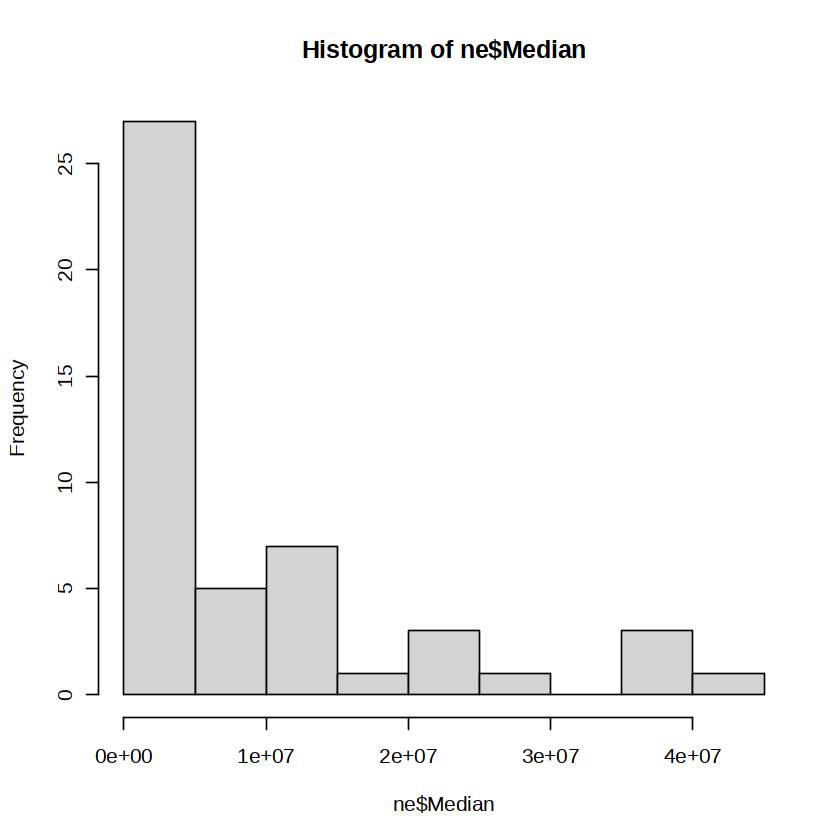

In [76]:
# Distribution of the data
hist(ne$Median) 


#### Negative binomial model

In [42]:
full_mod_neg<-glmmTMB(Median~Habitat+continent+range+Habitat*continent+Habitat*range + (1|continent/City),family= nbinom2,data=ne,na.action = "na.fail")
mod<-dredge(full_mod_neg, trace=T, rank="AICc")
mod

best_model<-glmmTMB(Median~Habitat + (1|continent/City),family= nbinom2,data=ne,na.action = "na.fail")
glmmTMB:::Anova.glmmTMB(best_model)
diagnostics.plot.dharma(best_model)


Warning message in fitTMB(TMBStruc):
“Model convergence problem; false convergence (8). See vignette('troubleshooting')”
Fixed terms are "cond((Int))" and "disp((Int))"



0 : glmmTMB(formula = Median ~ (1 | continent/City), data = ne, family = nbinom2, 
    na.action = "na.fail", ziformula = ~0, dispformula = ~1)


Warning message in fitTMB(TMBStruc):
“Model convergence problem; singular convergence (7). See vignette('troubleshooting')”


1 : glmmTMB(formula = Median ~ continent + (1 | continent/City), 
    data = ne, family = nbinom2, na.action = "na.fail", ziformula = ~0, 
    dispformula = ~1)


Warning message in fitTMB(TMBStruc):
“Model convergence problem; extreme or very small eigenvalues detected. See vignette('troubleshooting')”
Warning message in fitTMB(TMBStruc):
“Model convergence problem; false convergence (8). See vignette('troubleshooting')”


2 : glmmTMB(formula = Median ~ Habitat + (1 | continent/City), data = ne, 
    family = nbinom2, na.action = "na.fail", ziformula = ~0, 
    dispformula = ~1)
3 : glmmTMB(formula = Median ~ continent + Habitat + (1 | continent/City), 
    data = ne, family = nbinom2, na.action = "na.fail", ziformula = ~0, 
    dispformula = ~1)


Warning message in fitTMB(TMBStruc):
“Model convergence problem; false convergence (8). See vignette('troubleshooting')”


4 : glmmTMB(formula = Median ~ range + (1 | continent/City), data = ne, 
    family = nbinom2, na.action = "na.fail", ziformula = ~0, 
    dispformula = ~1)


Warning message in fitTMB(TMBStruc):
“Model convergence problem; non-positive-definite Hessian matrix. See vignette('troubleshooting')”
Warning message in fitTMB(TMBStruc):
“Model convergence problem; singular convergence (7). See vignette('troubleshooting')”


5 : glmmTMB(formula = Median ~ continent + range + (1 | continent/City), 
    data = ne, family = nbinom2, na.action = "na.fail", ziformula = ~0, 
    dispformula = ~1)
6 : glmmTMB(formula = Median ~ Habitat + range + (1 | continent/City), 
    data = ne, family = nbinom2, na.action = "na.fail", ziformula = ~0, 
    dispformula = ~1)
7 : glmmTMB(formula = Median ~ continent + Habitat + range + (1 | 
    continent/City), data = ne, family = nbinom2, na.action = "na.fail", 
    ziformula = ~0, dispformula = ~1)


Warning message in fitTMB(TMBStruc):
“Model convergence problem; false convergence (8). See vignette('troubleshooting')”


11 : glmmTMB(formula = Median ~ continent + Habitat + (1 | continent/City) + 
    continent:Habitat, data = ne, family = nbinom2, na.action = "na.fail", 
    ziformula = ~0, dispformula = ~1)


Warning message in fitTMB(TMBStruc):
“Model convergence problem; false convergence (8). See vignette('troubleshooting')”


15 : glmmTMB(formula = Median ~ continent + Habitat + range + (1 | 
    continent/City) + continent:Habitat, data = ne, family = nbinom2, 
    na.action = "na.fail", ziformula = ~0, dispformula = ~1)


Warning message in fitTMB(TMBStruc):
“Model convergence problem; false convergence (8). See vignette('troubleshooting')”


22 : glmmTMB(formula = Median ~ Habitat + range + (1 | continent/City) + 
    Habitat:range, data = ne, family = nbinom2, na.action = "na.fail", 
    ziformula = ~0, dispformula = ~1)


Warning message in fitTMB(TMBStruc):
“Model convergence problem; false convergence (8). See vignette('troubleshooting')”


23 : glmmTMB(formula = Median ~ continent + Habitat + range + (1 | 
    continent/City) + Habitat:range, data = ne, family = nbinom2, 
    na.action = "na.fail", ziformula = ~0, dispformula = ~1)
31 : glmmTMB(formula = Median ~ continent + Habitat + range + (1 | 
    continent/City) + continent:Habitat + Habitat:range, data = ne, 
    family = nbinom2, na.action = "na.fail", ziformula = ~0, 
    dispformula = ~1)


,cond((Int)),disp((Int)),cond(continent),cond(Habitat),cond(range),cond(continent:Habitat),cond(Habitat:range),df,logLik,AICc,delta,weight
,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<mdl.wght>
1,15.95696,+,NA,NA,NA,NA,NA,4,-785.8014,1580.533,0.000000,NA
3,15.49298,+,NA,+,NA,NA,NA,5,-785.1837,1581.796,1.262967,NA
2,13.29364,+,+,NA,NA,NA,NA,9,-780.2928,1583.323,2.789483,NA
7,15.38422,+,NA,+,+,NA,NA,6,-784.9839,1584.017,3.483534,NA
6,13.29375,+,+,NA,+,NA,NA,10,-779.6455,1585.237,4.703859,NA
4,12.74515,+,+,+,NA,NA,NA,10,-779.7249,1585.396,4.862648,NA
23,15.19198,+,NA,+,+,NA,+,7,-784.6533,1586.107,5.573506,NA
8,12.68252,+,+,+,+,NA,NA,11,-778.8978,1587.129,6.595809,NA
24,12.34928,+,+,+,+,NA,+,12,-778.4622,1589.839,9.305733,NA


,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>
Habitat,1.180874,1,0.2771782


ERROR: Error in diagnostics.plot.dharma(best_model): impossible de trouver la fonction "diagnostics.plot.dharma"


# Growth rate in recent past

Number of populations stable or decreasing in the pas 500years :   

In [ ]:
variation<-matrix(c(20,13,4,11),ncol=2,byrow=TRUE)
colnames(variation)<-c("urb","rur")
rownames(variation)<-c("stable","decreasing")
variation

chisq.test(variation, correct = FALSE)

## Plot

In [84]:
list<-c("Albuquerque", "Antwerp", "Armidale","Athens","Buenos_Aires",
        "Calgary","Cape_Town","Christchurch","Kunming","Landshut","Linkoping","Loja","Memphis",
        "Mexico_City","Munich","Palmerston_North","Punta_Arenas","Quito","Sapporo","Tehran","Thessaloniki",
        "Toronto","Vancouver","Warsaw")

columns<- c("year","Time.r","LowerQ.r","Median.r","UpperQ.r","Habitat.r","City.r","Time.u","LowerQ.u","Median.u","UpperQ.u","Habitat.u","City.u") 
full_data<- data.frame(matrix(nrow = 0, ncol = length(columns))) 
for (city in list){
    rural_ne <- read.table(paste0("/scratch/projects/trifolium/glue/demography/glue_demography/results/epos/epos/run/",city,"_r_4fold.epos.dat"))
    rural_ne$habitat<-c(rep("Rural",nrow(rural_ne)))
    rural_ne$city<-c(rep(city,nrow(rural_ne)))
    colnames(rural_ne)<-c("Time", "LowerQ", "Median", "UpperQ","Habitat","City")
    rural_ne$year<-round(rural_ne$Time)
    rural<-complete(rural_ne, year=0:100000)
    rural<-fill(rural, Median, .direction = "up")
    rural<-fill(rural, City, .direction = "up")
    rural1<-setDT(rural)[!duplicated(rleid(year))]
    rural2<-subset(rural1, year<=500)

    urban_ne <- read.table(paste0("/scratch/projects/trifolium/glue/demography/glue_demography/results/epos/epos/run/",city,"_u_4fold.epos.dat"))
    urban_ne$habitat<-c(rep("urban",nrow(urban_ne)))
    urban_ne$city<-c(rep(city,nrow(urban_ne)))
    colnames(urban_ne)<-c("Time", "LowerQ", "Median", "UpperQ","Habitat","City")
    urban_ne$year<-round(urban_ne$Time)
    urban<-complete(urban_ne, year=0:100000)
    urban<-fill(urban, Median, .direction = "up")
    urban<-fill(urban, City, .direction = "up")
    urban1<-setDT(urban)[!duplicated(rleid(year))]
    urban2<-subset(urban1, year<=500)
    
    merged<-merge(rural2,urban2,by="year", all.x=TRUE, all.y=TRUE)
    full_data<-rbind(full_data,merged)
    
}
colnames(full_data)=columns
full_data$diff<-(full_data$Median.y)-(full_data$Median.x)
colnames(full_data)=columns
head(full_data)



ERROR: Error in columns + "diff": argument non numérique pour un opérateur binaire


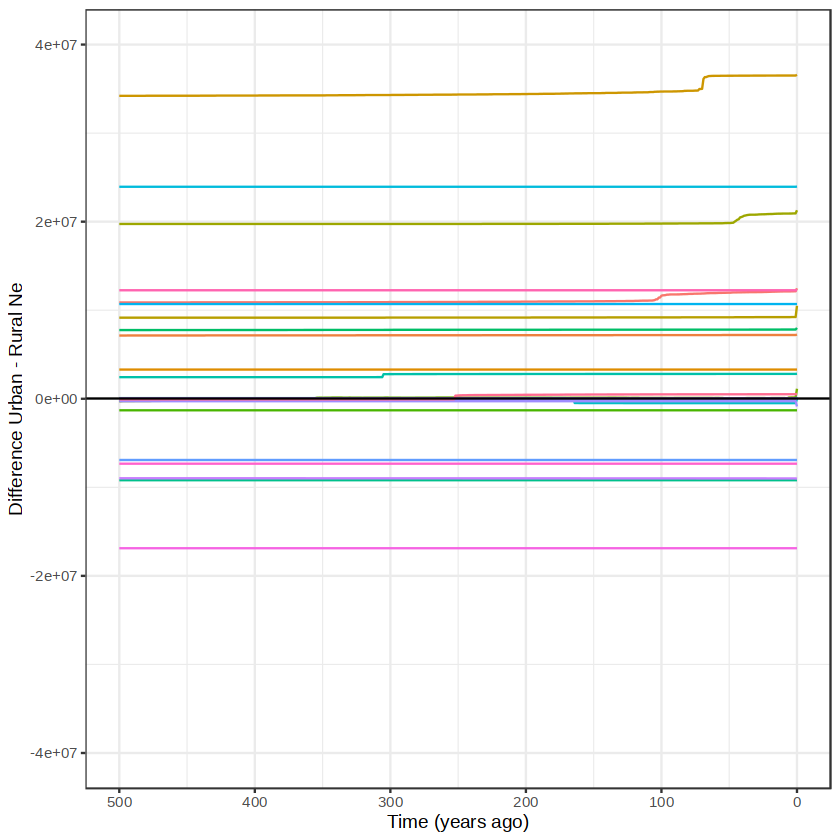

In [92]:
full_data$diff<-(full_data$Median.y)-(full_data$Median.x)

p<-ggplot(data=full_data, aes(x=year, y=diff, color=City.x)) + 
        geom_line() + 
        theme_bw() + 
        theme(legend.position = "none")+
        ylim(-40000000,40000000)+
        geom_hline(yintercept=0)+
        labs(x ="Time (years ago)", y = "Difference Urban - Rural Ne")+
        scale_x_reverse()
p



In [43]:
## Data-frame preparation
ne_tot<-read.table(paste0("/scratch/projects/trifolium/glue/demography/glue_demography/results/epos/epos/run/ne_current_data.txt"))
colnames(ne_tot)<-c("Time_0","LowerQ_0", "Median_0", "UpperQ_0","City","Habitat")

year100<-read.table("/scratch/projects/trifolium/glue/demography/glue_demography/results/epos/epos/run/ne_100ya_data.txt")
colnames(year100)<-c("Time_100","Time","LowerQ_100", "Median_100", "UpperQ_100","City","Habitat")
year250<-read.table("/scratch/projects/trifolium/glue/demography/glue_demography/results/epos/epos/run/ne_250ya_data.txt")
colnames(year250)<-c("Time_250","Time","LowerQ_250", "Median_250", "UpperQ_250","City","Habitat")
year500<-read.table("/scratch/projects/trifolium/glue/demography/glue_demography/results/epos/epos/run/ne_500ya_data.txt")
colnames(year500)<-c("Time_500","Time","LowerQ_500", "Median_500", "UpperQ_500","City","Habitat")

ne1<-merge(ne_tot,year100, by.x=c("City","Habitat"), by.y=c("City","Habitat"), all.x=TRUE, all.y=TRUE)
ne2<-merge(ne1,year250, by.x=c("City","Habitat"), by.y=c("City","Habitat"), all.x=TRUE, all.y=TRUE)
ne3<-merge(ne2,year500, by.x=c("City","Habitat"), by.y=c("City","Habitat"), all.x=TRUE, all.y=TRUE)
ne3$City<-gsub('Buenos', "Buenos_Aires", ne3$City)
ne3$City<-gsub('Cape', 'Cape_Town', ne3$City)
ne3$City<-gsub('Mexico', 'Mexico_City', ne3$City)
ne3$City<-gsub('Palmerston', 'Palmerston_North', ne3$City)
ne3$City<-gsub('Punta', 'Punta_Arenas', ne3$City)
ne3$growth_100<-(log(ne3$Median_100)-log(ne3$Median_0))/100
ne3$growth_250<-(log(ne3$Median_250)-log(ne3$Median_0))/250
ne3$growth_500<-(log(ne3$Median_500)-log(ne3$Median_0))/500

# Merging with details in the sample_sheet
sample_sheet<-read.csv("/scratch/projects/trifolium/glue/demography/glue_demography/genomic-analyses/resources/glue_noLowCities_sampleSheet_noRelated.txt", header=TRUE, sep="\t")
city_detail<-distinct(sample_sheet, city, .keep_all= TRUE)
ne<-merge(ne3,city_detail, by.x="City", by.y="city", all.x=TRUE, all.y=FALSE)


## Wilcoxon test

Warning message in wilcox.test.default(x = c(0.0161817159240286, 0.000300022503037987, :
“cannot compute exact p-value with zeroes”



	Wilcoxon signed rank test with continuity correction

data:  growth_100 by Habitat
V = 105, p-value = 0.005745
alternative hypothesis: true location shift is greater than 0


Warning message in wilcox.test.default(x = c(0.00819755678645374, 0.000159225001601676, :
“cannot compute exact p-value with zeroes”



	Wilcoxon signed rank test with continuity correction

data:  growth_250 by Habitat
V = 102, p-value = 0.009211
alternative hypothesis: true location shift is greater than 0


Warning message in wilcox.test.default(x = c(0.0041544923022328, 0.000108668701926661, :
“cannot compute exact p-value with zeroes”



	Wilcoxon signed rank test with continuity correction

data:  growth_500 by Habitat
V = 102, p-value = 0.009211
alternative hypothesis: true location shift is greater than 0


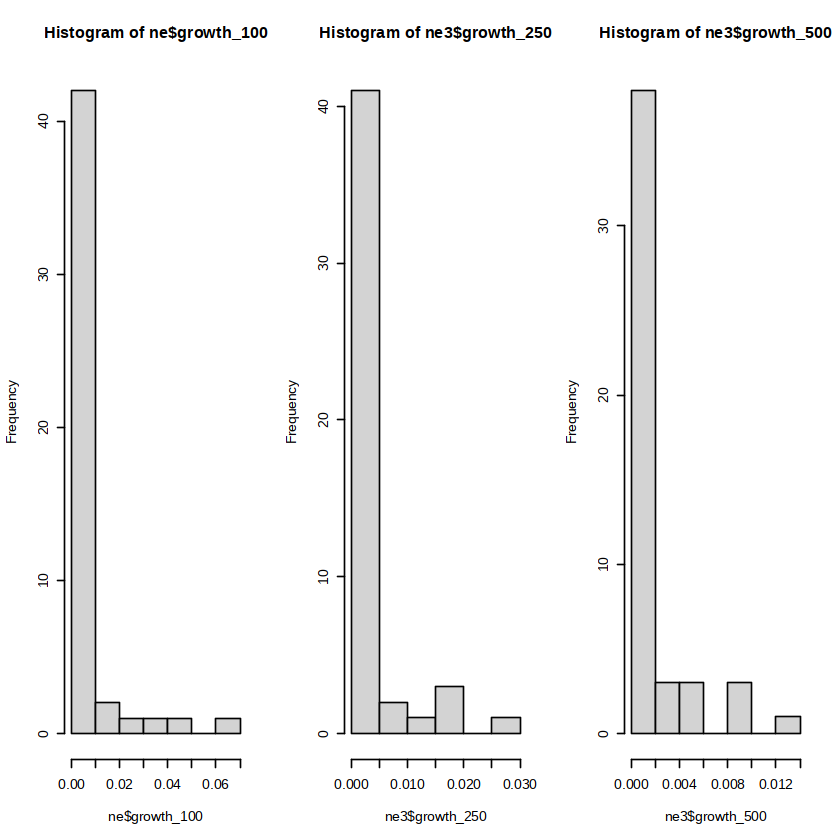

In [152]:
par(mfrow=c(1,3))
hist(ne$growth_100)
hist(ne3$growth_250)
hist(ne3$growth_500)

# 9 over 24 are ties
wilcox.test(growth_100 ~ Habitat, data = ne, paired = TRUE, alternative="greater")
wilcox.test(growth_250 ~ Habitat, data = ne, paired = TRUE, alternative="greater")
wilcox.test(growth_500 ~ Habitat, data = ne, paired = TRUE, alternative="greater")
                    


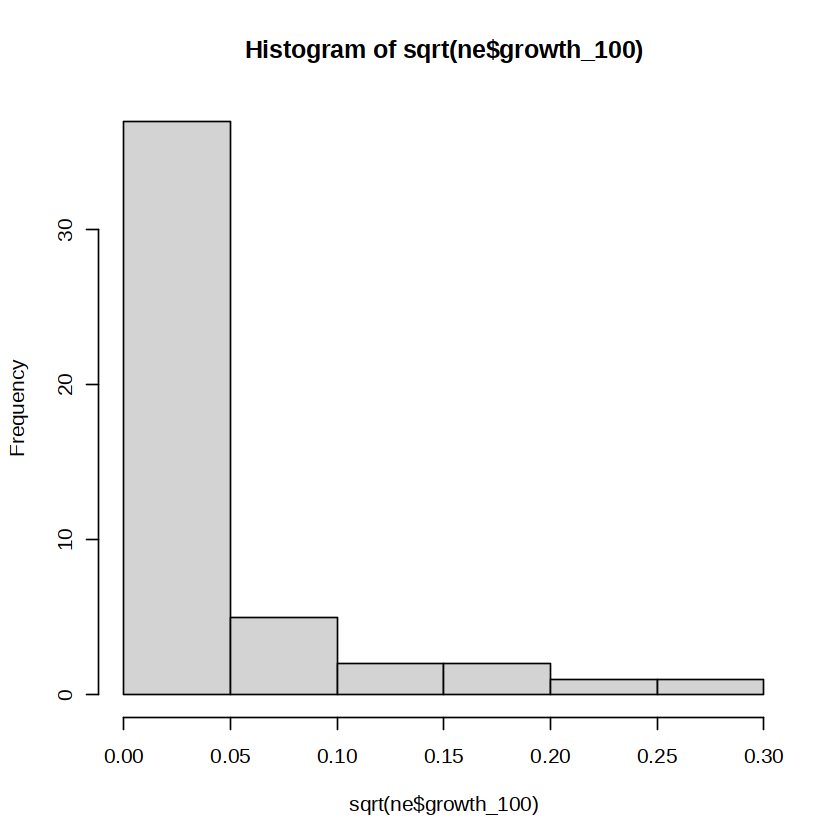

 Family: gaussian  ( identity )
Formula:          
growth_100_log ~ Habitat + continent + range + Habitat * continent +  
    Habitat * range + (1 | continent/City)
Data: ne

     AIC      BIC   logLik deviance df.resid 
  -267.3   -235.5    150.7   -301.3       31 

Random effects:

Conditional model:
 Groups         Name        Variance  Std.Dev. 
 City:continent (Intercept) 2.609e-14 1.615e-07
 continent      (Intercept) 5.579e-14 2.362e-07
 Residual                   1.100e-04 1.049e-02
Number of obs: 48, groups:  City:continent, 24; continent, 6

Dispersion estimate for gaussian family (sigma^2): 0.00011 

Conditional model:
                           Estimate Std. Error z value Pr(>|z|)    
(Intercept)                0.038481   0.010488   3.669 0.000243 ***
Habitaturban              -0.036184   0.014832  -2.440 0.014702 *  
continentASI              -0.035095   0.012845  -2.732 0.006290 ** 
continentEU               -0.032598   0.017126  -1.903 0.056983 .  
continentNAM          

,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>
Habitat,8.06107463,1,0.004522635
continent,5.83871196,5,0.322230687
range,0.05872276,1,0.808526174
Habitat:continent,4.98674251,5,0.417500296
Habitat:range,0.01703682,1,0.896150951


Fixed terms are "cond((Int))" and "disp((Int))"



0 : glmmTMB(formula = growth_100_log ~ (1 | continent/City), data = ne, 
    na.action = "na.fail", ziformula = ~0, dispformula = ~1)


Warning message in fitTMB(TMBStruc):
“Model convergence problem; extreme or very small eigenvalues detected. See vignette('troubleshooting')”


1 : glmmTMB(formula = growth_100_log ~ continent + (1 | continent/City), 
    data = ne, na.action = "na.fail", ziformula = ~0, dispformula = ~1)
2 : glmmTMB(formula = growth_100_log ~ Habitat + (1 | continent/City), 
    data = ne, na.action = "na.fail", ziformula = ~0, dispformula = ~1)


Warning message in fitTMB(TMBStruc):
“Model convergence problem; extreme or very small eigenvalues detected. See vignette('troubleshooting')”


3 : glmmTMB(formula = growth_100_log ~ continent + Habitat + (1 | 
    continent/City), data = ne, na.action = "na.fail", ziformula = ~0, 
    dispformula = ~1)
4 : glmmTMB(formula = growth_100_log ~ range + (1 | continent/City), 
    data = ne, na.action = "na.fail", ziformula = ~0, dispformula = ~1)


Warning message in fitTMB(TMBStruc):
“Model convergence problem; extreme or very small eigenvalues detected. See vignette('troubleshooting')”


5 : glmmTMB(formula = growth_100_log ~ continent + range + (1 | continent/City), 
    data = ne, na.action = "na.fail", ziformula = ~0, dispformula = ~1)
6 : glmmTMB(formula = growth_100_log ~ Habitat + range + (1 | continent/City), 
    data = ne, na.action = "na.fail", ziformula = ~0, dispformula = ~1)
7 : glmmTMB(formula = growth_100_log ~ continent + Habitat + range + 
    (1 | continent/City), data = ne, na.action = "na.fail", ziformula = ~0, 
    dispformula = ~1)


Warning message in fitTMB(TMBStruc):
“Model convergence problem; extreme or very small eigenvalues detected. See vignette('troubleshooting')”


11 : glmmTMB(formula = growth_100_log ~ continent + Habitat + (1 | 
    continent/City) + continent:Habitat, data = ne, na.action = "na.fail", 
    ziformula = ~0, dispformula = ~1)
15 : glmmTMB(formula = growth_100_log ~ continent + Habitat + range + 
    (1 | continent/City) + continent:Habitat, data = ne, na.action = "na.fail", 
    ziformula = ~0, dispformula = ~1)
22 : glmmTMB(formula = growth_100_log ~ Habitat + range + (1 | continent/City) + 
    Habitat:range, data = ne, na.action = "na.fail", ziformula = ~0, 
    dispformula = ~1)


Warning message in fitTMB(TMBStruc):
“Model convergence problem; extreme or very small eigenvalues detected. See vignette('troubleshooting')”


23 : glmmTMB(formula = growth_100_log ~ continent + Habitat + range + 
    (1 | continent/City) + Habitat:range, data = ne, na.action = "na.fail", 
    ziformula = ~0, dispformula = ~1)


Warning message in fitTMB(TMBStruc):
“Model convergence problem; extreme or very small eigenvalues detected. See vignette('troubleshooting')”


31 : glmmTMB(formula = growth_100_log ~ continent + Habitat + range + 
    (1 | continent/City) + continent:Habitat + Habitat:range, 
    data = ne, na.action = "na.fail", ziformula = ~0, dispformula = ~1)


,cond((Int)),disp((Int)),cond(continent),cond(Habitat),cond(range),cond(continent:Habitat),cond(Habitat:range),df,logLik,AICc,delta,weight
,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<mdl.wght>
3,0.009419811,+,NA,+,NA,NA,NA,5,143.8821,-276.3356,0.0000000,3.721802e-01
7,0.011088346,+,NA,+,+,NA,NA,6,145.0213,-275.9938,0.3417713,3.137173e-01
23,0.012417520,+,NA,+,+,NA,+,7,145.7733,-274.7467,1.5889334,1.681592e-01
1,0.005121988,+,NA,NA,NA,NA,NA,4,141.0201,-273.1100,3.2255878,7.418664e-02
5,0.006790523,+,NA,NA,+,NA,NA,5,142.0285,-272.6285,3.7070765,5.831386e-02
4,0.024687159,+,+,+,NA,NA,NA,10,147.4230,-268.9000,7.4355995,9.039269e-03
8,0.024687160,+,+,+,+,NA,NA,11,147.4486,-265.5640,10.7716339,1.704993e-03
2,0.020389334,+,+,NA,NA,NA,NA,9,144.1359,-265.5349,10.8006531,1.680433e-03
24,0.026016335,+,+,+,+,NA,+,12,148.2821,-263.6500,12.6856402,6.547891e-04


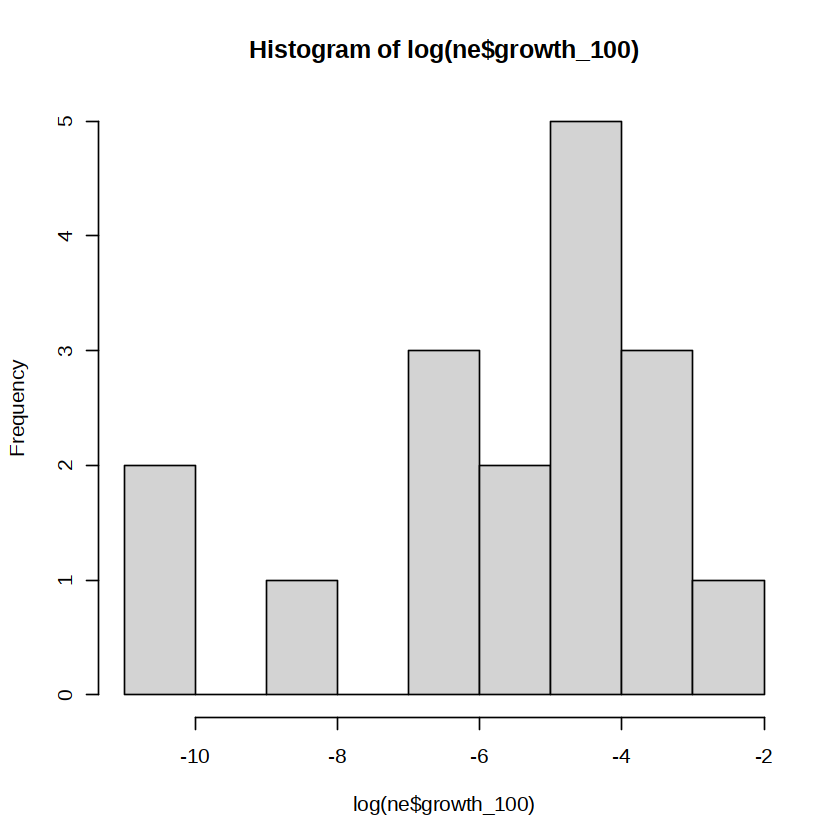

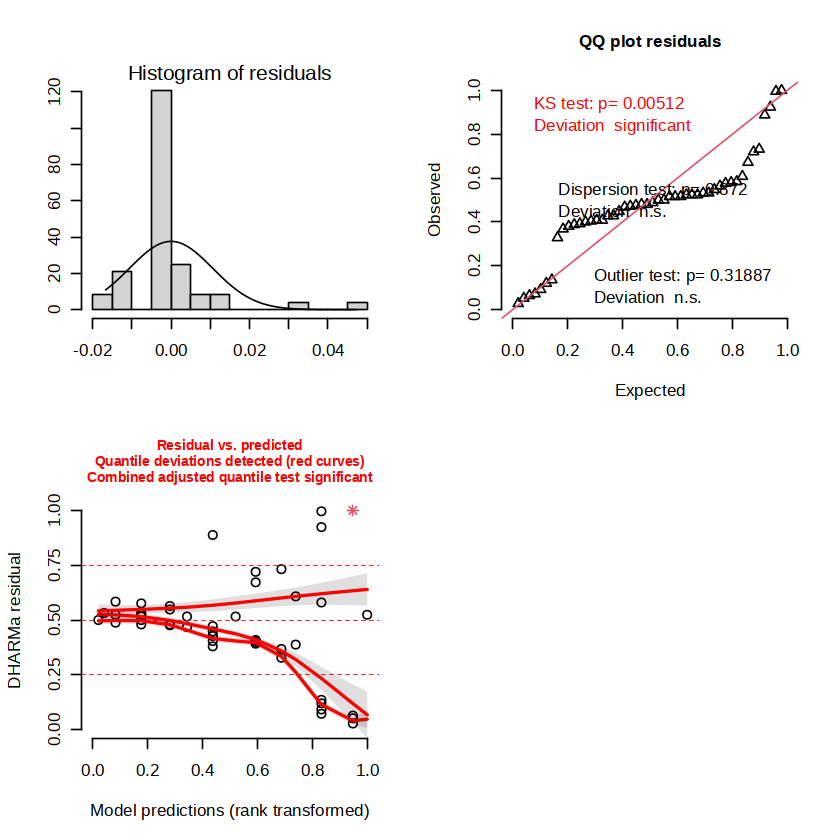

In [147]:
hist(sqrt(ne$growth_100))
hist(log(ne$growth_100))
ne$growth_100_log<-log(ne$growth_100+1)

mod2<-glmmTMB(growth_100_log ~ Habitat+continent+range+Habitat*continent+Habitat*range + (1|continent/City), data=ne, na.action="na.fail")
diagnostics.plot.dharma(mod2)

summary(mod2)
glmmTMB:::Anova.glmmTMB(mod2)
#mod2<-lmer(growth_100_log ~ Habitat+continent+range+Habitat*continent+Habitat*range + (1|continent/City), data=ne)

mod<-dredge(mod2, trace=T, rank="AICc")
mod


boundary (singular) fit: see help('isSingular')



,Sum Sq,Mean Sq,NumDF,DenDF,F value,Pr(>F)
,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
Habitat,0.0008866217,0.0008866217,1,46,5.825892,0.01983083


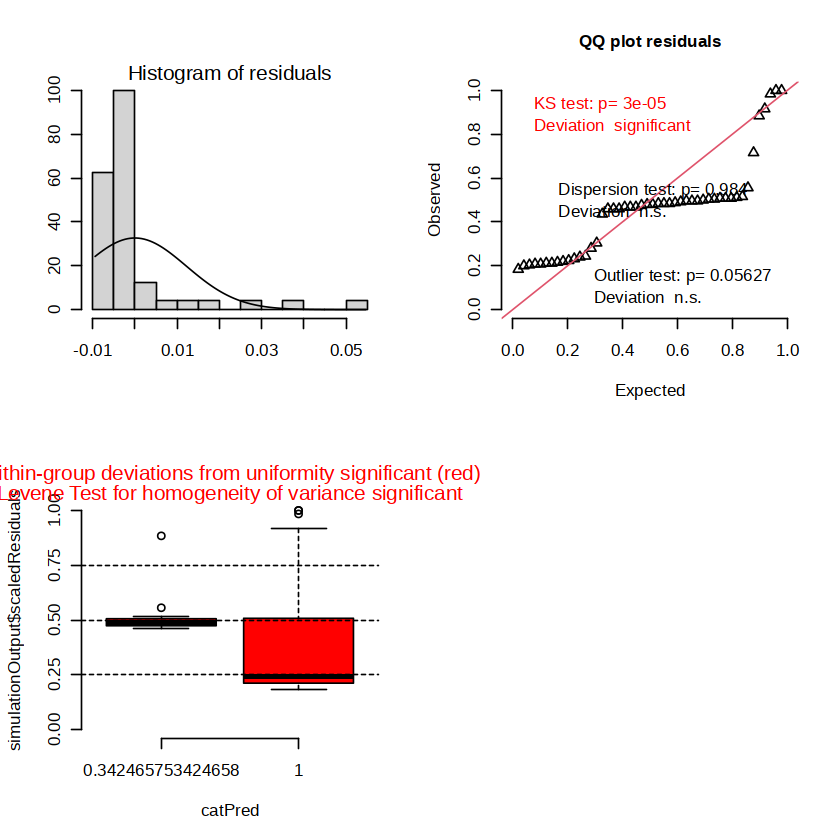

In [156]:
mod2<-lmer(growth_100_log ~ Habitat+(1|City), data=ne)
anova(mod2)
diagnostics.plot.dharma(mod2)


# Correlation of Ne between methods

In [5]:
# Ne EPOS
ne_tot<-read.table(paste0("/scratch/projects/trifolium/glue/demography/glue_demography/results/epos/epos/run/ne_current_data.txt"))
colnames(ne_tot)<-c("Time_0","LowerQ_0", "Median_0", "UpperQ_0","City","Habitat")

# Ne GADMA
ne_gadma<-read.table('../analyses/tables/ne_gadma.txt',header=TRUE)
ne_gadma$habitat[ne_gadma$habitat == "r"] <- "rural"
ne_gadma$habitat[ne_gadma$habitat == "u"] <- "urban"

ne<-merge(ne_tot,ne_gadma, by.x=c("City","Habitat"), by.y=c("city","habitat"), all.x=TRUE, all.y=FALSE)

# Pi
library(readr)
library(dplyr)
obs_div_df <- suppressMessages(read_delim('../analyses/tables/div_popStruct/observed_urban-rural_pi.txt.bz2', delim = '\t'))  # Observed urban-rural thetas
obs_div_df<-subset(obs_div_df, city !='Bogota' & city !='Canberra' & city !='Hiroshima' & city!='Kyoto' & city!='Medellin' & city!='Melbourne' & city!='Paris')
sample_sheet<-read.csv("/scratch/projects/trifolium/glue/demography/glue_demography/genomic-analyses/resources/glue_noLowCities_sampleSheet_noRelated.txt", header=TRUE, sep="\t")
city_detail<-distinct(sample_sheet, city, .keep_all= TRUE)
div_table<-merge(obs_div_df,city_detail, by.x="city", by.y="city", all.x=TRUE, all.y=FALSE)
div_table$habitat[div_table$habitat == "r"] <- "rural"
div_table$habitat[div_table$habitat == "u"] <- "urban"

ne_tot<-merge(ne,div_table, by.x=c("City","Habitat"), by.y=c("city","habitat"), all.x=TRUE, all.y=FALSE)
head(ne_tot)

,City,Habitat,Time_0,LowerQ_0,Median_0,UpperQ_0,ne_gadma,tp_mean,tw_mean,tp_sd,⋯,nSites,continent,pop,individual,site,sample,range,library,lane,city_pop
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>
1,Albuquerque,rural,0,1,228000,947000,21019785,0.02698932,0.03200117,0.001375431,⋯,1014098,NAM,29,5,r,Albuquerque_29_5,Introduced,glue_low1,1,Albuquerque_.29
2,Albuquerque,urban,0,10600000,12700000,27800000,18914952,0.02897677,0.03454662,0.001330479,⋯,805367,NAM,29,5,r,Albuquerque_29_5,Introduced,glue_low1,1,Albuquerque_.29
3,Antwerp,rural,0,1,1970000,2200000,25748668,0.03431930,0.04283631,0.001813351,⋯,274252,EU,36,4,r,Antwerp_36_4,Native,glue_low1,1,Antwerp_.36
4,Antwerp,urban,0,1,9220000,29100000,22803243,0.02856077,0.03414765,0.001343769,⋯,925024,EU,36,4,r,Antwerp_36_4,Native,glue_low1,1,Antwerp_.36
5,Armidale,rural,0,34400000,37500000,42700000,41243936,0.02896160,0.03372373,0.001361144,⋯,966853,OCE,35,11,r,Armidale_35_11,Introduced,glue_low1,1,Armidale_.35
6,Armidale,urban,0,17000000,40800000,45900000,41754943,0.03398263,0.04105213,0.003436243,⋯,162945,OCE,35,11,r,Armidale_35_11,Introduced,glue_low1,1,Armidale_.35


In [16]:
cor.test(ne_tot$Median_0,ne_tot$ne_gadma)


	Pearson's product-moment correlation

data:  ne_tot$Median_0 and ne_tot$ne_gadma
t = -0.095362, df = 34, p-value = 0.9246
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.3430450  0.3138697
sample estimates:
        cor 
-0.01635221 


In [17]:
cor.test(ne_tot$Median_0,ne_tot$tp_mean)


	Pearson's product-moment correlation

data:  ne_tot$Median_0 and ne_tot$tp_mean
t = 3.9692, df = 36, p-value = 0.0003298
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.2817481 0.7407633
sample estimates:
      cor 
0.5517364 


In [18]:
cor.test(ne_tot$ne_gadma,ne_tot$tp_mean)


	Pearson's product-moment correlation

data:  ne_tot$ne_gadma and ne_tot$tp_mean
t = 0.84242, df = 34, p-value = 0.4054
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.1946927  0.4503679
sample estimates:
      cor 
0.1429891 


In [6]:
cor.test(ne_tot$Median_0,ne_tot$taj)


	Pearson's product-moment correlation

data:  ne_tot$Median_0 and ne_tot$taj
t = -3.2762, df = 36, p-value = 0.002333
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.6927859 -0.1884255
sample estimates:
      cor 
-0.479241 
